<a href="https://colab.research.google.com/github/SethJorissen/ANM_anomalies_project/blob/main/ANM_anomalies_project_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANM anomaly detection project - phase 2

Tsinghua 2023, produced by Aris Dressino and Seth Jorissen

## 1. initial set up

- fetch data for analysis
- import needed libraries

In [1]:
# fetch phase 1 and 2 data from github to colab working directory - run once
# consider using another method if working from local client
%%capture
#import shutil
#shutil.rmtree('/content/phase1')
!apt install subversion
!svn checkout https://github.com/SethJorissen/ANM_anomalies_project/trunk/phase1
!svn checkout https://github.com/SethJorissen/ANM_anomalies_project/trunk/phase2

In [2]:
# needed libraries
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from tqdm import tqdm
from typing import Dict, List
from typing import List, Dict, Tuple, Set
from scipy.stats import pearsonr
import shutil

##2. Exploratory data analysis

- provide summary statistics and relevant analysis of the data
- plot relevant features of the dataset against timestamp



In [3]:
# import train set
# Set the path to the directory containing the CSV files
path = 'phase2/dataset/train/processed'

# Get a list of all CSV files in the directory
files = glob.glob(os.path.join(path, '*.csv'))

df_list = []
# Iterate over each file, read it into a DataFrame, and add a new column with the filename
for file in files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Add a new column with the filename without the extension
    filename = os.path.splitext(os.path.basename(file))[0]
    df['service'] = filename
    df_list.append(df)

# Concatenate all dataframes into a single dataframe
train = pd.concat(df_list, ignore_index=True)

train.head(5)

,timestamp,container_network_receive_packets_dropped.eth0,container_spec_cpu_shares,container_spec_memory_swap_limit_MB,container_fs_writes_MB./dev/vda,container_network_transmit_packets_dropped.eth0,container_network_receive_errors.eth0,container_fs_writes_merged./dev/vda1,container_threads_max,container_fs_write_seconds./dev/vda1,...,container_spec_cpu_period,container_memory_swap,container_threads,container_network_transmit_errors.eth0,container_spec_memory_limit_MB,container_fs_reads_merged./dev/vda1,container_network_transmit_MB.eth0,container_cpu_system_seconds,container_cpu_load_average_10s,service
0,1647619260,0.0,204.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,29.0,0.0,256.0,0.0,1.973727,0.190,0.0,productcatalogservice-2
1,1647619320,0.0,204.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,29.0,0.0,256.0,0.0,2.055229,0.145,0.0,productcatalogservice-2
2,1647619380,0.0,204.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,29.0,0.0,256.0,0.0,1.991700,0.175,0.0,productcatalogservice-2
3,1647619440,0.0,204.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,29.0,0.0,256.0,0.0,1.982994,0.170,0.0,productcatalogservice-2
4,1647619500,0.0,204.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,29.0,0.0,256.0,0.0,2.035729,0.190,0.0,productcatalogservice-2


In [4]:
# describe numerical metrics of train dataset
pd.set_option('display.max_columns', None)
train.describe()

,timestamp,container_network_receive_packets_dropped.eth0,container_spec_cpu_shares,container_spec_memory_swap_limit_MB,container_fs_writes_MB./dev/vda,container_network_transmit_packets_dropped.eth0,container_network_receive_errors.eth0,container_fs_writes_merged./dev/vda1,container_threads_max,container_fs_write_seconds./dev/vda1,container_fs_inodes_free./dev/vda1,container_fs_sector_reads./dev/vda1,container_network_transmit_packets.eth0,container_cpu_usage_seconds,container_cpu_cfs_throttled_periods,container_file_descriptors,container_cpu_cfs_throttled_seconds,container_fs_reads./dev/vda,container_fs_reads./dev/vda1,container_memory_failures.container.pgfault,container_memory_failures.container.pgmajfault,container_memory_failures.hierarchy.pgfault,container_memory_failures.hierarchy.pgmajfault,container_memory_max_usage_MB,container_fs_inodes./dev/vda1,container_fs_reads_MB./dev/vda,container_last_seen,container_cpu_user_seconds,container_fs_limit_MB./dev/vda1,container_fs_io_time_weighted_seconds./dev/vda1,container_fs_sector_writes./dev/vda1,container_network_receive_packets.eth0,container_memory_working_set_MB,container_fs_io_current./dev/vda1,container_memory_usage_MB,container_fs_usage_MB./dev/vda1,container_sockets,container_fs_io_time_seconds./dev/vda1,container_memory_failcnt,container_spec_cpu_quota,container_fs_writes./dev/vda,container_fs_writes./dev/vda1,container_ulimits_soft.max_open_files,container_network_receive_MB.eth0,container_tasks_state.iowaiting,container_tasks_state.running,container_tasks_state.sleeping,container_tasks_state.stopped,container_tasks_state.uninterruptible,container_fs_read_seconds./dev/vda1,container_memory_rss,container_start_time_seconds,container_memory_mapped_file,container_spec_memory_reservation_limit_MB,container_memory_cache,container_cpu_cfs_periods,container_spec_cpu_period,container_memory_swap,container_threads,container_network_transmit_errors.eth0,container_spec_memory_limit_MB,container_fs_reads_merged./dev/vda1,container_network_transmit_MB.eth0,container_cpu_system_seconds,container_cpu_load_average_10s
count,6.043800e+04,60438.0,57560.000000,57560.000000,57560.0,60438.0,60438.0,57560.0,57560.0,57560.0,57560.0,57560.0,60438.000000,57560.000000,57560.000000,57560.000000,57560.000000,57560.000000,57560.0,57560.000000,57560.000000,57560.000000,57560.000000,57560.000000,57560.000000,55160.000000,5.756000e+04,57560.000000,57560.000000,57560.0,57560.0,60438.000000,57560.000000,57560.0,57560.000000,57560.000000,57560.000000,57560.0,57560.000000,57560.000000,57560.0,57560.0,5.516000e+04,60438.000000,57560.0,57560.0,57560.0,57560.0,57560.0,57560.0,5.756000e+04,5.756000e+04,5.756000e+04,57560.0,5.756000e+04,57560.000000,57560.0,57560.0,57560.000000,60438.0,57560.000000,57560.0,60438.000000,57560.000000,57560.0
mean,1.647662e+09,0.0,206.700000,368.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,924.801215,0.206512,0.232922,36.786211,0.015082,0.092393,0.0,187.468016,0.017391,187.468016,0.017391,345.199549,0.000718,0.001766,1.647662e+09,0.119992,604630.738281,0.0,0.0,980.062690,64.047569,0.0,73.251540,83.679335,5.438988,0.0,0.750000,37000.000000,0.0,0.0,9.011200e+05,0.168638,0.0,0.0,0.0,0.0,0.0,0.0,4.827034e+07,1.647205e+09,4.181940e+06,0.0,1.566113e+07,113.878423,100000.0,0.0,25.588870,0.0,368.125000,0.0,1.341939,0.060221,0.0
std,2.492441e+04,0.0,95.695972,280.152678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1633.733856,0.260263,0.758866,48.356892,0.055175,5.503762,0.0,616.697959,1.403371,616.697959,1.403371,288.281897,0.046823,0.114247,2.492442e+04,0.132230,0.000000,0.0,0.0,1533.730644,53.881059,0.0,54.288065,160.741765,2.885062,0.0,2.576357,12884.210647,0.0,0.0,3.510187e+05,0.280004,0.0,0.0,0.0,0.0,0.0,0.0,5.436171e+07,1.479419e+05,5.950796e+06,0.0,7.325586e+06,97.499338,0.0,0.0,4.989798,0.0,280.152678,0.0,1.425130,0.100049,0.0
min,1.647619e+09,0.0,102.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.500000,0.000000,0.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000

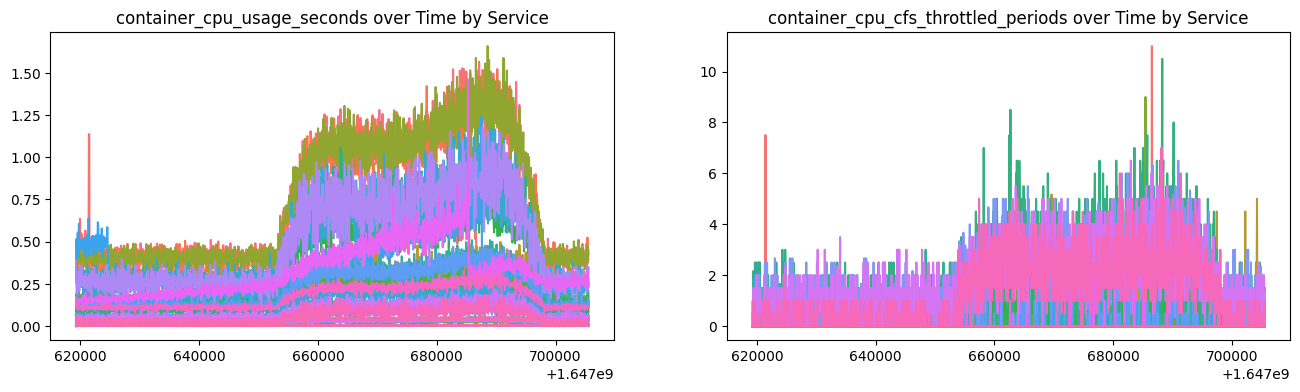

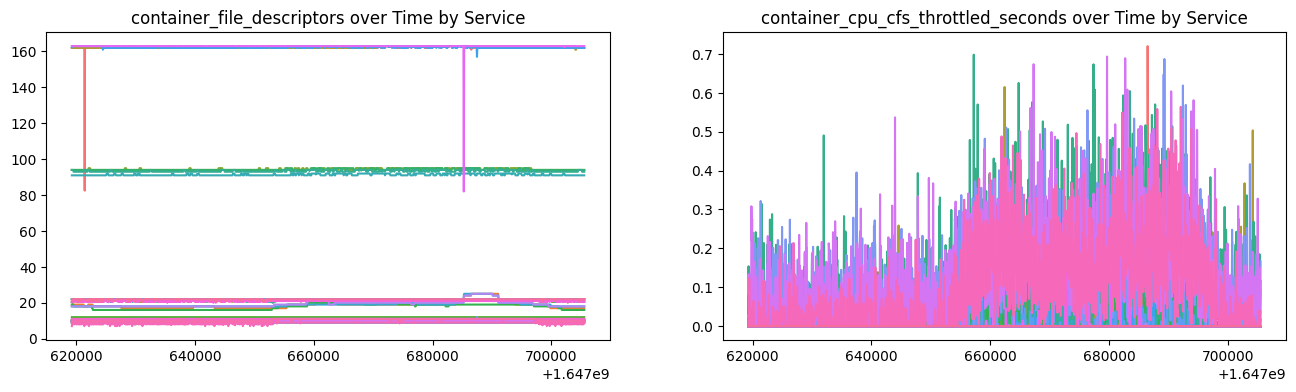

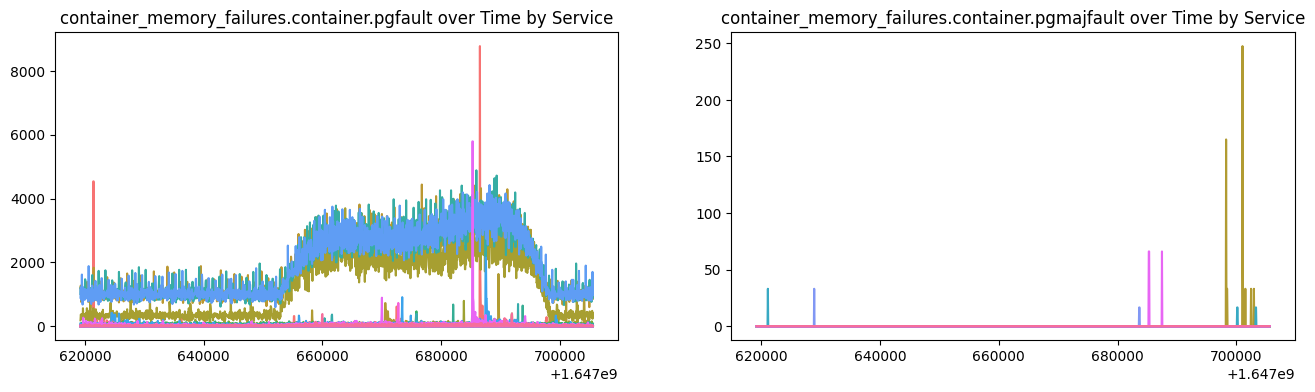

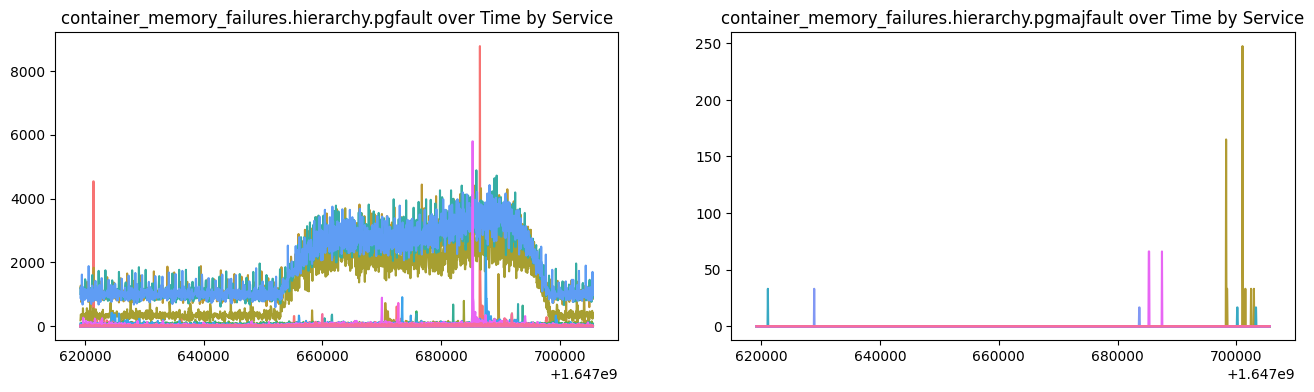

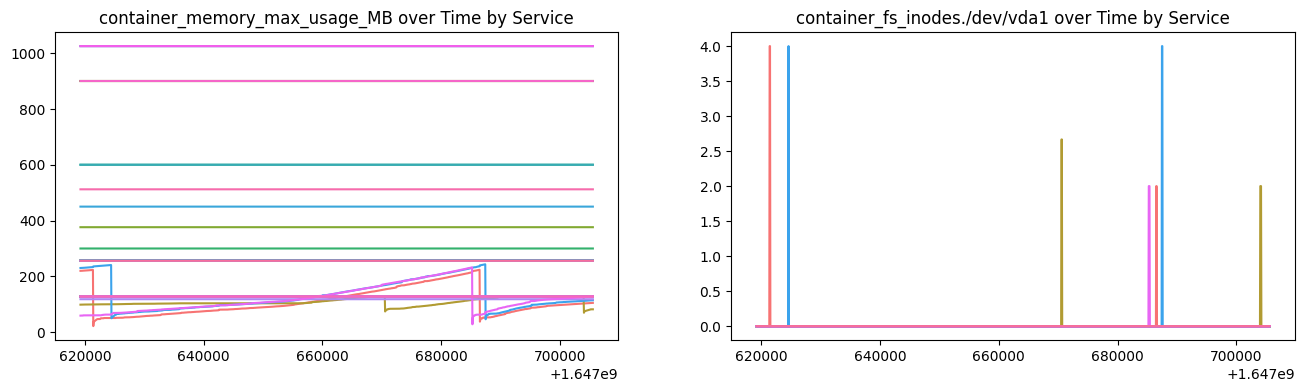

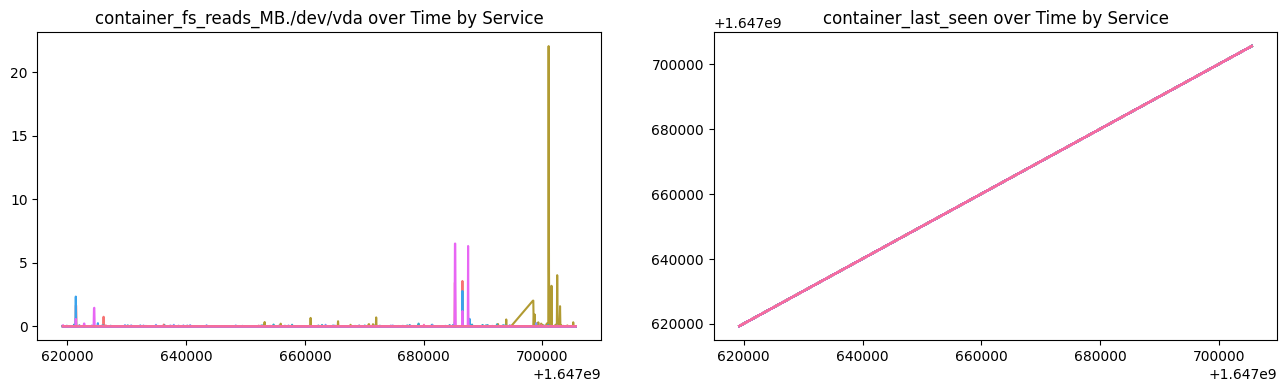

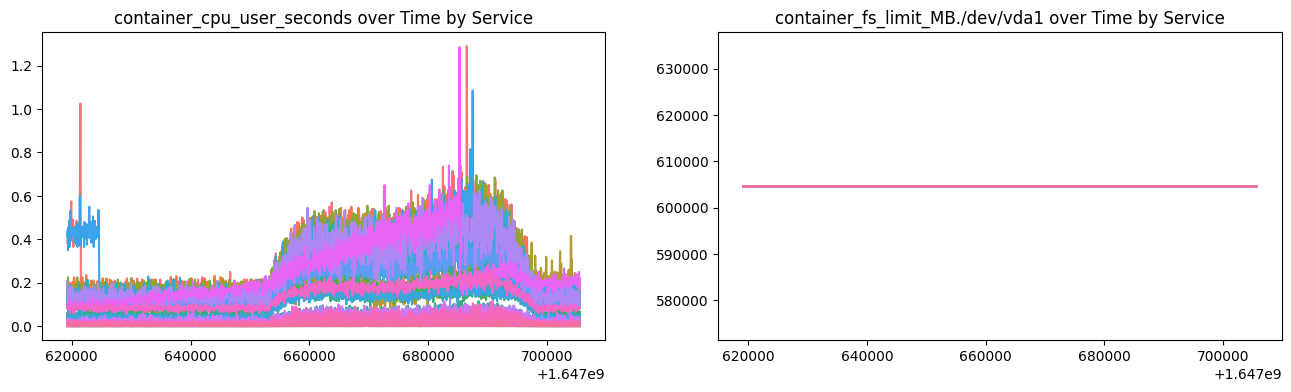

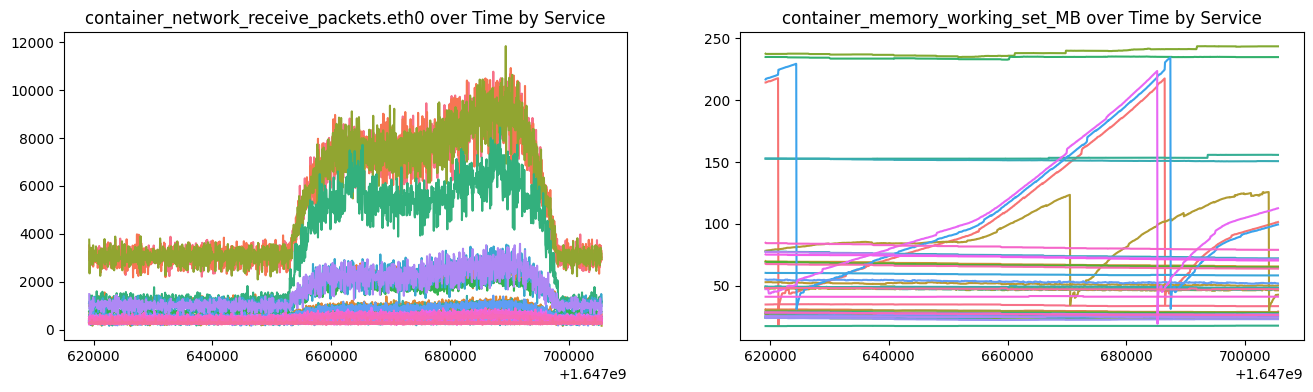

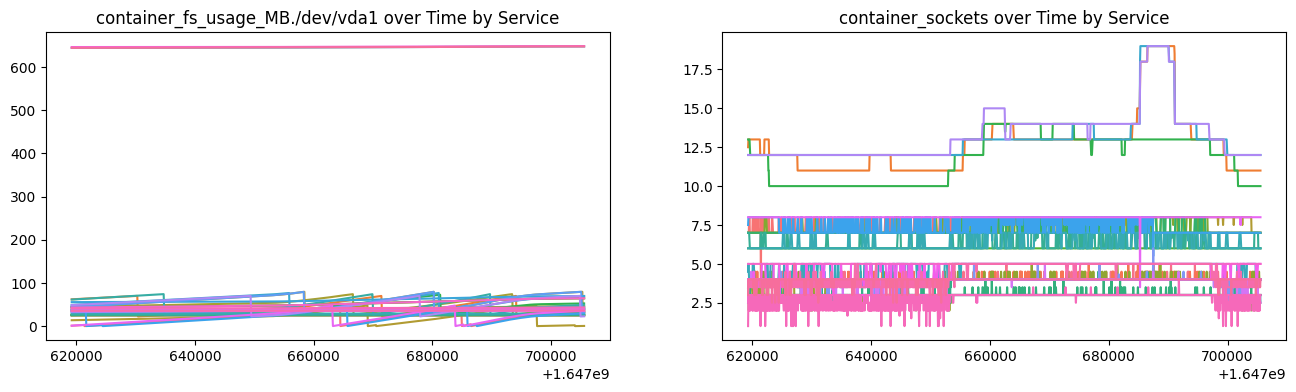

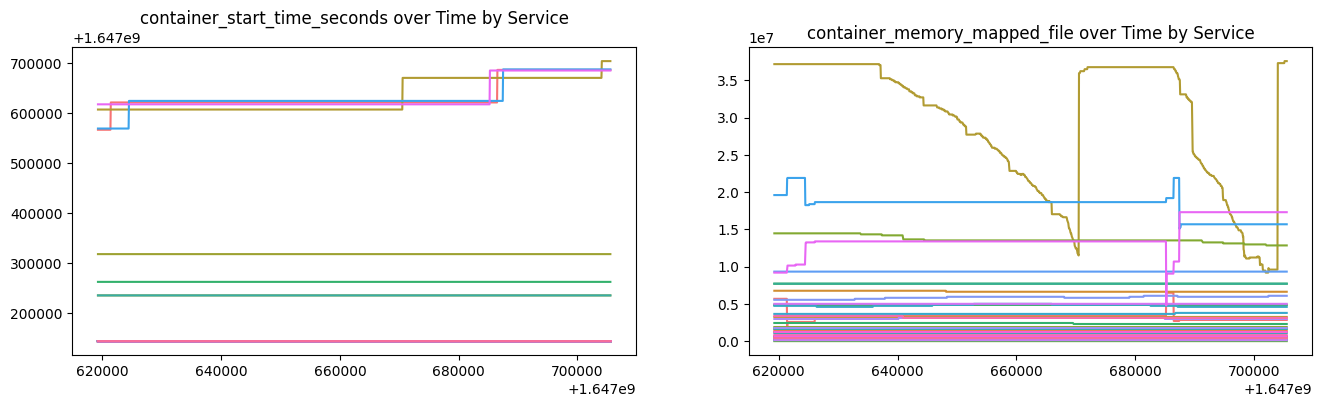

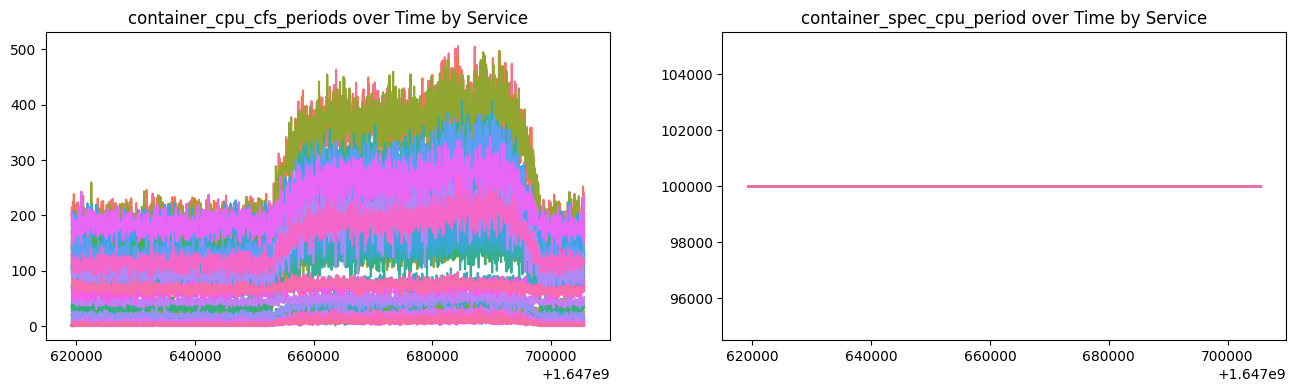

In [5]:
# Loop over all columns in the DataFrame except "timestamp" and "service"
cols = train.columns.drop(["timestamp", "service"])
for i in range(0, len(cols), 2):
    col1 = cols[i]
    col2 = cols[i+1] if i+1 < len(cols) else None

    # Check if all values in the column are 0 or the same value
    if (len(train[col1].unique()) == 1 or train[col1].sum() == 0) or (not col2 or (len(train[col2].unique()) == 1 or train[col2].sum() == 0)):
        continue

    # Check if the values are equal when grouped by service for both columns
    if col2:
        grouped1 = train.groupby('service')[col1].nunique()
        grouped2 = train.groupby('service')[col2].nunique()
        if len(grouped1.unique()) == 1 or len(grouped2.unique()) == 1:
            continue
        
    # Create a new row of subplots with 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))

    # Create the first plot in the left column
    sns.lineplot(x="timestamp", y=col1, hue="service", data=train, ax=axs[0])
    axs[0].set_title(f"{col1} over Time by Service")

    # Remove the legend from the first plot
    axs[0].get_legend().remove()

    # Create the second plot in the right column if there is a second column
    if col2:
        sns.lineplot(x="timestamp", y=col2, hue="service", data=train, ax=axs[1])
        axs[1].set_title(f"{col2} over Time by Service")

        # Remove the legend from the second plot
        axs[1].get_legend().remove()

    # Remove axis labels from all subplots
    for ax in axs:
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Set the height of all subplots to the same value
    fig.subplots_adjust(hspace=0.4)

    # Add a border to the row of subplots
    for ax in axs:
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)

    # Show the row of subplots
    plt.show()



##3. Anomaly Localization

This model first creates an anomaly detection model for all microservices using a LSTM AE. This model will return a series of anomaly scores over time and a boolean which indicates whether the threshold was breached.

Then a root cause analasis starts. The edges and nodes of the topology graph will be given weights. The nodes of this graph will be ranked by PageRank.

###3.1 Data management

This class will prepare the data in the test/train folders. Given a folder it will load all csv files and and put them in a dictionary with their name as key. It gets rid of NaN values and removes irrelavent columns.

In [128]:
class DataManager:
    def __init__(self, data_path: str, train: bool = False, ignore_columns=None):
        if ignore_columns is None:
            ignore_columns = [
                'timestamp',
                'container_start_time_seconds',
                'container_last_seen']
        self.data_path = data_path
        self.ignore_columns = ignore_columns
        self.train = train

        # Load from file
        self.data = {}
        self.columns = []
        self.__load()

    def __fill_na(self, df: pd.DataFrame):
        if self.train:
            df.interpolate(method='linear', inplace=True)
        df.fillna(0.0, inplace=True)

    def __normalize_data(self, data: np.ndarray):
        # Subtract the mean from each column
        if self.train:
          mean = np.mean(data, axis=0)
          std = np.std(data, axis=0)
          normalized_data = (data - mean) / (std + 1e-8)
        else:
          mean = np.mean(data[:15], axis=0)
          std = np.std(data[:15], axis=0)
          normalized_data = (data - mean) / (std + 1e-8)

        return normalized_data

    def __load(self):
        for file in os.listdir(self.data_path):
            if not file.endswith('.csv'):
                continue

            cur_df = pd.read_csv(os.path.join(self.data_path, file), engine='c')
            self.__fill_na(cur_df)
            self.columns = sorted([i for i in cur_df.columns.values if i not in self.ignore_columns])
            raw_data = cur_df[self.columns].values

            # Normalize the data to have the same mean distribution
            normalized_data = self.__normalize_data(raw_data)

            self.data[file[:-4]] = normalized_data

    def get(self, s: str) -> np.ndarray:
        return self.data[s]

###3.2 Anomaly detection

The anomaly detection model uses two classes:
- $LSTMAEDetector$ holds a LSTM AE to detect anomolies in a microservice. Before fitting the model, it first prepares the input data by scaling and creating sequences. Then it defines the model and fits it on the data. Finally the loss is scaled so all microservices can use the same threshold. To make a prediction, the data is prepared the same way and the scaled reconstruction loss of the model is calculated. This will be the anomaly score. All the anomaly scores will be returned and it will also check whether the threshold was breached at any point.

- The anomaly detector class will create and fit the LSTM AE Detectors of all microservices. When detecting an anomoly, it will call the detector of all microservices and return whether they encountered an anomaly and their anomaly scores.





In [145]:
# ROBUST COVARIANCE

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from typing import Dict
from tqdm import tqdm


class RobustCovarianceDetector:
    def __init__(self):
        self.detector = None

    def fit(self, data: np.ndarray):
        scaler = StandardScaler()
        normalized_data = scaler.fit_transform(data)
        self.detector = EllipticEnvelope()
        self.detector.fit(normalized_data)

    def decision_function(self, data: np.ndarray):
        # Data: [timesteps x features]
        scores = self.detector.decision_function(data)
        anomaly_scores = np.ones_like(scores) - (1 + scores) / 2
        anomaly_scores /= np.mean(anomaly_scores[:15])
        return anomaly_scores


class AnomalyDetector:
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.detector_dict: Dict[str, RobustCovarianceDetector] = {}

    def fit(self, data: DataManager):
        for s in tqdm(list(data.data.keys()), desc='Fitting detector(s)'):
            detector = RobustCovarianceDetector()
            detector.fit(data.get(s))
            self.detector_dict[s] = detector

    def detect(self, data: DataManager):
        # Simply return the max anomaly degree of all metrics
        result: Dict[str, float] = {}

        for k, v in data.data.items():
            detect_result = self.detector_dict[k].decision_function(v)

            assert isinstance(detect_result, np.ndarray)
            result[k] = np.mean(detect_result)

        return result


In [46]:
# GRAPH BASED DETECTOR

from sklearn.neighbors import LocalOutlierFactor

class GraphBasedDetector:
    def __init__(self):
        self.detector = None

    def fit(self, data: np.ndarray):
        self.detector = LocalOutlierFactor(contamination='auto')
        self.detector.fit(data)

    def decision_function(self, data: np.ndarray):
        # Data: [timesteps x features]
        scores = self.detector.decision_function(data)
        anomaly_scores = np.ones_like(scores) - (1 + scores) / 2
        anomaly_scores /= np.mean(anomaly_scores[:15])
        return anomaly_scores

class AnomalyDetector:
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.detector_dict: Dict[str, Any] = {}

    def fit(self, data: DataManager):
        for s in tqdm(list(data.data.keys()), desc='Fitting detector(s)'):
            detector = GraphBasedDetector()
            detector.fit(data.get(s))
            self.detector_dict[s] = detector

    def detect(self, data: DataManager):
        # Simply return the max anomaly degree of all metrics
        result: Dict[str, float] = {}

        for k, v in data.data.items():
            detect_result = self.detector_dict[k].decision_function(v)

            assert type(detect_result) == np.ndarray
            result[k] = np.mean(detect_result)

        return result

In [49]:
# SVM BASED DETECTOR

from sklearn.svm import OneClassSVM

class SVMBasedDetector:
    def __init__(self):
        self.detector = None

    def fit(self, data: np.ndarray):
        self.detector = OneClassSVM(nu=0.1)
        self.detector.fit(data)

    def decision_function(self, data: np.ndarray):
        # Data: [timesteps x features]
        scores = self.detector.decision_function(data)
        anomaly_scores = np.ones_like(scores) - (1 + scores) / 2
        anomaly_scores /= np.mean(anomaly_scores[:15])
        return anomaly_scores

class AnomalyDetector:
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.detector_dict: Dict[str, Any] = {}

    def fit(self, data: DataManager):
        for s in tqdm(list(data.data.keys()), desc='Fitting detector(s)'):
            detector = SVMBasedDetector()
            detector.fit(data.get(s))
            self.detector_dict[s] = detector

    def detect(self, data: DataManager):
        # Simply return the max anomaly degree of all metrics
        result: Dict[str, float] = {}

        for k, v in data.data.items():
            detect_result = self.detector_dict[k].decision_function(v)

            assert type(detect_result) == np.ndarray
            result[k] = np.mean(detect_result)

        return result

In [144]:
# ISOLATION FOREST

from sklearn.ensemble import IsolationForest

class IsolationForestDetector:
    def __init__(self):
        self.detector = None

    def fit(self, data: np.ndarray):
        self.detector = IsolationForest()
        self.detector.fit(data)

    def decision_function(self, data: np.ndarray):
        # Data: [timesteps x features]
        scores = self.detector.decision_function(data)
        anomaly_scores = np.ones_like(scores) - (1 + scores) / 2
        anomaly_scores /= np.mean(anomaly_scores[:15])
        return anomaly_scores

class AnomalyDetector:
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.detector_dict = {}

    def fit(self, data: DataManager):
        for s in tqdm(list(data.data.keys()), desc='Fitting detector(s)'):
            detector = IsolationForestDetector()
            detector.fit(data.get(s))
            self.detector_dict[s] = detector

    def detect(self, data: DataManager):
        result = {}

        for k, v in data.data.items():
            detect_result = self.detector_dict[k].decision_function(v)
            assert isinstance(detect_result, np.ndarray)
            result[k] = np.mean(detect_result)

        return result

In [64]:
# K SIGMA DETECTOR - BASELINE

class KSigmaDetecor:
    def __init__(self):
        pass

    def fit(self, data: np.ndarray):
        self.mu = np.mean(data, axis=0, keepdims=True)
        self.sigma = np.std(data, axis=0, keepdims=True)

    def decision_function(self, data: np.ndarray, eps: float=1e-3):
        # Data: [timesteps x features]
        detect_result = []
        
        for i in range(data.shape[1]):
            # Check if data is constant
            if np.all(self.sigma[0, i] == 0) and np.all(data[:, i] == data[0, i]):
                detect_result.append(np.zeros_like(data[:, i], dtype=np.float32))
            else:
                detect_result.append(np.abs(data[:, i] - self.mu[:, i]) / (self.sigma[:, i] + eps))

        return np.stack(detect_result, axis=1)


class AnomalyDetector:
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.detector_dict: Dict[str, KSigmaDetecor] = {}

    def fit(self, data: DataManager):
        for s in tqdm(list(data.data.keys()), desc='Fitting detector(s)'):
            detector = KSigmaDetecor()
            detector.fit(data.get(s))
            self.detector_dict[s] = detector

    def detect(self, data: DataManager):
        # Simply return the max anomaly degree of all metrics
        result: Dict[str, float] = {}

        for k, v in data.data.items():
            detect_result = self.detector_dict[k].decision_function(v)

            assert type(detect_result) == np.ndarray
            result[k] = np.max(detect_result)

        return result

In [67]:
# SHUFFLING AUTOENCODER

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

class AutoencoderDetector:
    def __init__(self, input_dim, hidden_dim):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = None
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

    def fit(self, data):
        x = torch.tensor(data, dtype=torch.float).to(self.device)

        # Normalize input features
        scaler = StandardScaler()
        x = scaler.fit_transform(x)
        x = torch.tensor(x, dtype=torch.float).to(self.device)

        # Create Autoencoder model
        self.model = Autoencoder(self.input_dim, self.hidden_dim).to(self.device)

        # Train the model
        self.model.train()
        optimizer = optim.Adam(self.model.parameters(), lr=0.01)
        criterion = nn.MSELoss()

        num_epochs = 20
        batch_size = 64
        num_batches = len(x) // batch_size

        for epoch in range(num_epochs):
            np.random.shuffle(x)
            total_loss = 0

            for i in range(num_batches):
                batch = x[i * batch_size: (i + 1) * batch_size]
                optimizer.zero_grad()
                recon_batch = self.model(batch)
                loss = criterion(recon_batch, batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            avg_loss = total_loss / num_batches
            print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

    def decision_function(self, data):
        x = torch.tensor(data, dtype=torch.float).to(self.device)
        self.model.eval()
        with torch.no_grad():
            recon_data = self.model(x)

        reconstruction_error = torch.mean(torch.square(recon_data - x), dim=1)
        anomaly_scores = 1.0 - torch.exp(-reconstruction_error)
        return anomaly_scores.cpu().numpy()


class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x = self.decoder(x)
        return x


class AnomalyDetector:
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.detector_dict = {}

    def fit(self, data):
        hidden_dim = self.hyper_params.get('hidden_dim', 16)
        for key in tqdm(data.data.keys(), desc='Fitting detector(s)'):
            detector = AutoencoderDetector(data.get(key).shape[1], hidden_dim)
            detector.fit(data.get(key))
            self.detector_dict[key] = detector

    def detect(self, data):
        result = {}

        for key, values in data.data.items():
            detect_result = self.detector_dict[key].decision_function(values)
            assert isinstance(detect_result, np.ndarray)
            result[key] = np.mean(detect_result)

        return result

In [153]:
# GRAPH SAGE

import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn.functional as F
from typing import Dict
from tqdm import tqdm


class GraphSAGE(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GraphSAGE, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


class GraphSAGEDetector:
    def __init__(self, hidden_dim=16):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = None
        self.hidden_dim = hidden_dim
        self.input_dim = None

    def fit(self, data: np.ndarray):
        num_nodes, self.input_dim = data.shape

        x = torch.tensor(data, dtype=torch.float).to(self.device)

        # Normalize input features
        scaler = StandardScaler()
        x = scaler.fit_transform(x)
        x = torch.tensor(x, dtype=torch.float).to(self.device)

        # Create GraphSAGE model
        self.model = GraphSAGE(self.input_dim, self.hidden_dim)

        # Move model to the device
        self.model = self.model.to(self.device)

        # Train the model
        self.model.train()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.01)

        for epoch in range(20):
            optimizer.zero_grad()
            out = self.model(x)
            loss = F.mse_loss(out, x)
            loss.backward()
            optimizer.step()

    def decision_function(self, data: np.ndarray):
        x = torch.tensor(data, dtype=torch.float).to(self.device)

        self.model.eval()
        with torch.no_grad():
            out = self.model(x)

        reconstruction_error = torch.mean(torch.square(out - x), dim=1)
        anomaly_scores = 1 - reconstruction_error / torch.max(reconstruction_error)
        anomaly_scores = anomaly_scores.cpu().numpy()
        return anomaly_scores


class AnomalyDetector:
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.detector_dict: Dict[str, GraphSAGEDetector] = {}

    def fit(self, data: DataManager):
        for s in tqdm(list(data.data.keys()), desc='Fitting detector(s)'):
            detector = GraphSAGEDetector()
            detector.fit(data.get(s))
            self.detector_dict[s] = detector

    def detect(self, data: DataManager):
        result: Dict[str, float] = {}

        for k, v in data.data.items():
            detect_result = self.detector_dict[k].decision_function(v)

            assert isinstance(detect_result, np.ndarray)
            result[k] = np.mean(detect_result)

        return result


###3.3 Root cause localization
The root cause localization will rank all microservices based on the probability that they are the root cause of the anomaly. The ranker has to be initialized with an anomalydetector. To start ranking the microservices their anomaly scores are calculated. Afterwards, the algorithm will use following scoring formula to perform a simplified version of pagerank:

$$v_{t+1} = (1 - c)Pv_t + cu$$

where $v$ holds the score of all nodes, $P$ is a matrix holding the weights of all edges and $u$ is a vector with for each microservice, the max anomaly score. For all edges in the topology, $P$ is equal to the pearson correlation of the nodes it connects and 0 for all other edges. This means that the score for the nodes $v$ is parially defined by the anomaly score of the microservice and partially by the score of their parent nodes. However, that depends on the corralation between their anomaly scores.

This algrorithm is based on the MicroRCA algorithm, but we do not have all the data they had.

Li Wu, Johan Tordsson, Erik Elmroth, Odej Kao. MicroRCA: Root Cause Localization of Performance
Issues in Microservices. IEEE/IFIP Network Operations and Management Symposium (NOMS), Apr
2020, Budapest, Hungary. ffhal-02441640f

https://inria.hal.science/hal-02441640

In [36]:
#SCORE SORTING RANKER - BASELINE

class Ranker:
    """
        This is a naive ranking algorithm, which simply rank according to the anomaly scores.
    """
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.train_data = DataManager(hyper_params['train_dir'], train=True)
        self.anomaly_detector = AnomalyDetector(hyper_params)
        self._init_ranker()
    
    def _init_ranker(self):
        self.anomaly_detector.fit(self.train_data)

    def rank(self, case_dir: str):     
        # Load test data
        test_data = DataManager(case_dir)

        # Detect anomaly
        anomaly_score = self.anomaly_detector.detect(test_data)
        print(anomaly_score)

        # TODO: You need to modify the ranking algorithm to achieve better results!   
        # This is a naive ranking algorithm, which simply rank according to the anomaly scores.
        rank_result = sorted(list(anomaly_score.keys()), key=lambda x: anomaly_score[x], reverse=True)

        return rank_result

In [28]:
#SIMPLIFIED PAGE RANKER

def find_correlation(container1: np.ndarray, container2: np.ndarray):
    corr = []
    for i in range(container1.shape[1]):
        if not np.all(container1[:, i] == container1[0, i]) and not np.all(container2[:, i] == container1[0, i]):
              corr.append(abs(pearsonr(container1[:, i].flatten(), container1[:, i].flatten())[0]))
    return sum(corr)/len(corr)


class Ranker:
    """
        ...
    """
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.train_data = DataManager(hyper_params['train_dir'], True)
        self.anomaly_detector = AnomalyDetector(hyper_params)
        self._init_ranker()
    
    def _init_ranker(self):
        self.anomaly_detector.fit(self.train_data)

    def rank(self, case_dir: str):
        # Load test data
        test_data = DataManager(case_dir)

        # Detect anomaly
        anomaly_score = self.anomaly_detector.detect(test_data)

        services = list(anomaly_score.keys())

        max_anomaly = max(anomaly_score, key=anomaly_score.get)

        weights = {}

        for service in services:
            weights[service] = find_correlation(test_data.data[service], test_data.data[max_anomaly])

        # Find P and u for pagerank
        P = np.zeros((len(services), len(services)))
        v = np.ones((len(services), 1))
        u = np.ones((len(services), 1))

        with open(self.hyper_params['topology'], 'rt') as f:
            topology = json.load(f)

        for i, service in enumerate(services):
            P[i][i] = weights[service]
            u[i] = anomaly_score[service]
            # v[i] = anomaly_score[service]
            for key, values in topology.items():
                if service.startswith(key):
                    for value in values:
                        for j, s in enumerate(services):
                            if s.startswith(value):
                                P[j][i] = weights[s]

        P = (P.T / P.sum(axis=1)).T
        c = 0.3

        for _ in range(10):
            v = (1-c)*np.matmul(P, v) + u*c/len(services)

        # Rank services based on their page rank score
        scores = {services[i]: v[i][0] for i in range(len(services))}

        rank_result = sorted(list(scores.keys()), key=lambda x: scores[x], reverse=True)

        return rank_result

In [8]:
#https://netman.aiops.org/~peidan/ANM2023/7.TraceAnomalyDetection/LectureCoverage/2013SIGMETRICS13_Root%20Cause%20Detection%20in%20a%20Service-Oriented%20Architecture.pdf
#RANDOM WALK RANKER

def find_correlation(container1: np.ndarray, container2: np.ndarray):
    corr = []
    for i in range(container1.shape[1]):
        if not np.all(container1[:, i] == container1[0, i]) and not np.all(container2[:, i] == container1[0, i]):
              corr.append(abs(pearsonr(container1[:, i].flatten(), container1[:, i].flatten())[0]))
    return sum(corr)/len(corr)

# Monitor rank
class Ranker:
    """
        ...
    """
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.train_data = DataManager(hyper_params['train_dir'], True)
        self.anomaly_detector = AnomalyDetector(hyper_params)
        self._init_ranker()
    
    def _init_ranker(self):
        self.anomaly_detector.fit(self.train_data)

        self.services = list(self.train_data.data.keys())
        self.A = np.zeros((len(self.services), len(self.services)))
        self.rho = 0.3
        with open(self.hyper_params['topology'], 'rt') as f:
            topology = json.load(f)

        for i, service in enumerate(self.services):
            for key, values in topology.items():
                if service.startswith(key):
                    for value in values:
                        for j, s in enumerate(self.services):
                            if s.startswith(value):
                                self.A[i][j] = 1

    def rank(self, case_dir: str):
        # Load test data
        test_data = DataManager(case_dir)

        # Detect anomaly
        anomaly_score = self.anomaly_detector.detect(test_data)

        max_anomaly = max(anomaly_score, key=anomaly_score.get)

        # Find Q
        S = np.empty(len(self.services))
        u = np.empty(len(self.services))

        for i, service in enumerate(self.services):
            S[i] = find_correlation(test_data.data[service], test_data.data[max_anomaly])
            u[i] = anomaly_score[service]

        Q = self.A*S

        for i in range(len(self.services)):
            Q[i][i] = max(0, S[i] - np.max(Q[:][i]))

        Q = Q + (self.A.T*S*self.rho)

        Q = (Q.T / (Q.sum(axis=1) + 1e-5)).T

        v = np.ones(len(self.services))
        alpha = 0.8

        for _ in range(10):
            v = alpha*np.matmul(v, Q) + S*(1-alpha)

        # Rank services based on their page rank score
        scores = {self.services[i]: v[i] for i in range(len(self.services))}

        rank_result = sorted(list(scores.keys()), key=lambda x: scores[x], reverse=True)

        return rank_result

In [ ]:
# NORMALIZED SCORE RANKER

def find_correlation(container1: np.ndarray, container2: np.ndarray):
    corr = []
    for i in range(container1.shape[1]):
        if not np.all(container1[:, i] == container1[0, i]) and not np.all(container2[:, i] == container1[0, i]):
              corr.append(abs(pearsonr(container1[:, i].flatten(), container1[:, i].flatten())[0]))
    return sum(corr)/len(corr)

from scipy.stats import rankdata

class Ranker:
    """
    ...
    """
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.train_data = DataManager(hyper_params['train_dir'])
        self.anomaly_detector = AnomalyDetector(hyper_params)
        self._init_ranker()

    def _init_ranker(self):
        self.anomaly_detector.fit(self.train_data)

    def rank(self, case_dir: str):
        # Load test data
        test_data = DataManager(case_dir)

        # Detect anomaly
        anomaly_score = self.anomaly_detector.detect(test_data)
        print(anomaly_score)

        # Normalize anomaly scores
        scores = np.array(list(anomaly_score.values()))
        normalized_scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores) + 1e-8)

        # Obtain ranks
        ranks = rankdata(-scores, method='min')

        # Sort the ranks in ascending order and get the corresponding keys
        rank_result = [k for _, k in sorted(zip(ranks, anomaly_score.keys()))]

        # Sort the containers based on normalized scores
        rank_result = sorted(list(anomaly_score.keys()), key=lambda x: normalized_scores[list(anomaly_score.keys()).index(x)], reverse=True)

        return rank_result


In [23]:
#RANDOM WALK RANKER


def find_correlation(container1: np.ndarray, container2: np.ndarray):
    corr = []
    for i in range(container1.shape[1]):
        if not np.all(container1[:, i] == container1[0, i]) and not np.all(container2[:, i] == container1[0, i]):
              corr.append(abs(pearsonr(container1[:, i].flatten(), container1[:, i].flatten())[0]))
    return sum(corr)/len(corr)


class Ranker:
    def __init__(self, hyper_params):
        self.hyper_params = hyper_params
        self.train_data = DataManager(hyper_params['train_dir'], train=True)
        self.anomaly_detector = AnomalyDetector(hyper_params)
        self._init_ranker()

    def _init_ranker(self):
        self.anomaly_detector.fit(self.train_data)

    def rank(self, case_dir: str):
        # Load test data
        test_data = DataManager(case_dir)

        # Detect anomaly
        anomaly_score = self.anomaly_detector.detect(test_data)

        container_score = {container: np.mean(score[-15:]) for container, score in anomaly_score.items()}
        max_anomaly = max(container_score, key=container_score.get)

        services = list(anomaly_score.keys())

        corr = np.zeros(len(services))
        score = np.empty(len(services))       
        
        # Nodes all start at 1. Edeges initialized based on topology and correlations.
        nodes = np.ones(len(services)) / len(services)
        edges = np.zeros((len(services), len(services)))
        a = 0.6
        b = 0.9
        c = 0.9

        with open(self.hyper_params['topology'], 'rt') as f:
            topology = json.load(f)

        for i, service in enumerate(services):
            score[i] = container_score[service]
            for key, values in topology.items():
                if service.startswith(key):
                    for value in values:
                        for j, s in enumerate(services):
                            if s.startswith(value):
                                # Edge from parent to child in topology: corrolation between parent and child
                                if not np.all(anomaly_score[service][-15:] == anomaly_score[service][-15]) and not np.all(anomaly_score[s][-15:] == anomaly_score[s][-15]):
                                    edges[i][j] = abs(pearsonr(anomaly_score[service][-15:], anomaly_score[s][-15:])[0])
                                if not np.all(anomaly_score[service][:-15] == anomaly_score[service][0]) and not np.all(anomaly_score[s][:-15] == anomaly_score[s][0]):
                                    edges[j][i] = max(0, a*(abs(pearsonr(anomaly_score[service][:-15], anomaly_score[s][:-15])[0]) - edges[i][j]))

        # Edge to stay in node: max of incoming edges minus max of outgoing edges (capped at 0)
        np.fill_diagonal(edges, np.maximum(0, b*(edges.mean(axis=1) - edges.mean(axis=0))))

        # Normalisation
        edges = (edges / (edges.sum(axis=0) + 1e-5))
        score = score / score.sum()

        # Random walk
        for _ in range(50):
            nodes = c*np.matmul(nodes, edges) + (1-c)*score
        
        # Find scores
        scores = {services[i]: nodes[i] for i in range(len(services))}

        return sorted(list(scores.keys()), key=lambda x: scores[x], reverse=True)

###3.4 Training

In [154]:
"""
hyper_params = {
    'train_dir': 'phase2/dataset/train/processed',
    'test_dir': 'phase2/dataset/test/processed',
    'label_path': 'phase2/dataset/test/label.json',
    'topology': 'phase1/dataset/topology/service_topology.json'
}
"""
hyper_params = {
    'train_dir': 'phase1/dataset/train/processed',
    'test_dir': 'phase1/dataset/test/processed',
    'label_path': 'phase1/dataset/test/label.json',
    'topology': 'phase1/dataset/topology/service_topology.json'
}


ranker = Ranker(hyper_params)

Fitting detector(s): 100%|██████████| 42/42 [00:01<00:00, 26.50it/s]


##4. evaluation, prediction and metrics

- evaluate test set anomalies and rank them
- compare labels with predicted ranking
- information regarding indexing are provided

In [121]:
class Evaluator:
    """
        Evaluate the localization algorithm with the give label.
    """
    def __init__(self, label_path: str):
        self.label_path = label_path

        with open(self.label_path, 'rt') as f:
            self.label = json.load(f)

    def evaluate(self, detect_results: List[List[str]], topk: List[int] = [1, 10, 20], write_report: bool=False):
        """
            Input: List of cases. Each case is a ranked list of root causes from the most likely ones to the least likely ones.
            Print the evaluation result.
        """
        all_ranks: List[int] = []
        topk_hit: List[List[int]] = []

        for i, case in enumerate(detect_results):
            cur_label = self.label['cmdb_id'][i]

            # Cur_rank is the rank of current case. Default is length of the list + 1.
            cur_rank = len(case) + 1
            for rank, root_cause in enumerate(case):
                if cur_label in root_cause:
                    cur_rank = rank + 1
                    break
            
            all_ranks.append(cur_rank)
            
            # Calculate the topk hit for current case.
            cur_topk_hit = []
            for k in topk:
                if cur_rank <= k:
                    cur_topk_hit.append(1)
                else:
                    cur_topk_hit.append(0)
            topk_hit.append(cur_topk_hit)

            # Write report if true
            if write_report:
                os.makedirs("report", exist_ok=True)
                report_content = f"Label: {cur_label}\n========List=======\n"
                for rank, root_cause in enumerate(case):
                    report_content += f"{rank}: {root_cause}\n"
                    if cur_label in root_cause:
                        report_content += "^ ROOT CAUSE\n"
                with open(os.path.join("report", f"{i}.txt"), "wt") as f:
                    f.write(report_content)

        # Calculate the average results
        mrr = np.mean(1 / np.array(all_ranks))
        avg_topk_hit = np.mean(topk_hit, axis=0)

        # Report the result
        report: str = "--------------Report-------------\n"
        for i in range(len(all_ranks)):
            report += f"Case {i}: "
            for j, k in enumerate(topk):
                report += f"Top {k}: {topk_hit[i][j]}\t"
            report += f"Rank: {all_ranks[i]}\n"

        report += "============AVG=============="
        for j, k in enumerate(topk):
            report += f"Top {k}: {avg_topk_hit[j]:.4f}, "
        report += f"MRR: {mrr:.4f}"
        print(report)

In [32]:
# Generate a list of lists containing the labels for the test set of phase 1 only
# Load the JSON file
with open('phase1/dataset/test/label.json', 'r') as json_file:
    data = json.load(json_file)

df_labels = pd.DataFrame(data)
labels = df_labels.values.tolist()

print(labels)

[[1648486942, 'emailservice-0'], [1648491433, 'recommendationservice2-0'], [1648492533, 'currencyservice-1'], [1648507813, 'paymentservice-1'], [1648512399, 'productcatalogservice-0'], [1648518075, 'shippingservice2-0'], [1648520175, 'productcatalogservice-0'], [1648522456, 'paymentservice-0'], [1648525065, 'frontend2-0'], [1648540678, 'shippingservice-2'], [1648541744, 'frontend2-0'], [1648552790, 'adservice2-0'], [1648558337, 'recommendationservice-2'], [1648560649, 'cartservice-2'], [1648561519, 'emailservice-2'], [1648565706, 'frontend2-0'], [1648550137, 'cartservice-1'], [1648525567, 'cartservice-1'], [1648491097, 'paymentservice-2'], [1648494319, 'adservice-2'], [1648506344, 'productcatalogservice-1'], [1648516367, 'productcatalogservice-0'], [1648528148, 'recommendationservice-1'], [1648528984, 'shippingservice-2'], [1648531433, 'cartservice-2'], [1648540897, 'shippingservice-2'], [1648549152, 'emailservice-2'], [1648551076, 'shippingservice-2'], [1648552118, 'recommendationserv

In [155]:
result_list = []
case_idx: int = 0
with tqdm(total=len(os.listdir(hyper_params['test_dir']))) as t:
    while True:
        case_dir = os.path.join(hyper_params['test_dir'], str(case_idx))
        if not os.path.exists(case_dir):
            break
        t.set_description(f"Ranking {case_dir}")

        cur_rank = ranker.rank(case_dir)
        print("")
        print("the anomaly label is: ", labels[case_idx])
        print(cur_rank)
        for l in cur_rank:
          if l == labels[case_idx][1]:
            print("in the current rank, the original amonaly is in position ", cur_rank.index(l))
            break
        print("\n")
        result_list.append(cur_rank)

        # Update tqdm
        t.update()
        case_idx += 1

evaluator = Evaluator(hyper_params['label_path'])

evaluator.evaluate(result_list)

Ranking phase1/dataset/test/processed/1:   1%|          | 1/92 [00:00<00:38,  2.38it/s]

{'productcatalogservice-2': 0.91833335, 'cartservice-2': 0.8490877, 'productcatalogservice-0': 0.9, 'frontend-0': 0.5666667, 'redis-cart-0': 0.96638745, 'shippingservice-1': 0.75921255, 'recommendationservice-0': 0.56666666, 'currencyservice-1': 0.78536165, 'cartservice2-0': 0.93032783, 'currencyservice2-0': 0.58662593, 'paymentservice-2': 0.76666725, 'productcatalogservice-1': 0.56666714, 'adservice-0': 0.56666696, 'shippingservice2-0': 0.69965976, 'recommendationservice-2': 0.56666666, 'frontend2-0': 0.93333143, 'adservice2-0': 0.5657407, 'productcatalogservice2-0': 0.56667113, 'checkoutservice-1': 0.9009284, 'adservice-2': 0.65748596, 'redis-cart2-0': 0.9339977, 'currencyservice-2': 0.5700713, 'paymentservice-0': 0.9, 'adservice-1': 0.5611724, 'emailservice-2': 0.56666726, 'shippingservice-2': 0.5667614, 'frontend-1': 0.94266665, 'recommendationservice2-0': 0.56197935, 'cartservice-0': 0.85620785, 'currencyservice-0': 0.5849063, 'checkoutservice-2': 0.9030791, 'shippingservice-0': 0

Ranking phase1/dataset/test/processed/2:   2%|▏         | 2/92 [00:01<01:09,  1.29it/s]

{'productcatalogservice-2': 0.7958497, 'cartservice-2': 0.96116656, 'productcatalogservice-0': 0.7393299, 'frontend-0': 0.92153734, 'redis-cart-0': 0.83078295, 'shippingservice-1': 0.5543267, 'recommendationservice-0': 0.647678, 'currencyservice-1': 0.89166665, 'cartservice2-0': 0.6873526, 'currencyservice2-0': 0.81608325, 'paymentservice-2': 0.85117644, 'productcatalogservice-1': 0.62993973, 'adservice-0': 0.9307749, 'shippingservice2-0': 0.59162927, 'recommendationservice-2': 0.9283019, 'frontend2-0': 0.84636754, 'adservice2-0': 0.9345114, 'productcatalogservice2-0': 0.86666673, 'checkoutservice-1': 0.60099375, 'adservice-2': 0.91554666, 'redis-cart2-0': 0.87416524, 'currencyservice-2': 0.92742914, 'paymentservice-0': 0.63776016, 'adservice-1': 0.7250001, 'emailservice-2': 0.5738655, 'shippingservice-2': 0.697552, 'frontend-1': 0.8, 'recommendationservice2-0': 0.81415194, 'cartservice-0': 0.73459667, 'currencyservice-0': 0.91101915, 'checkoutservice-2': 0.8351041, 'shippingservice-0'

Ranking phase1/dataset/test/processed/3:   3%|▎         | 3/92 [00:02<01:27,  1.02it/s]

{'productcatalogservice-2': 0.73333365, 'cartservice-2': 0.56376433, 'productcatalogservice-0': 0.70064425, 'frontend-0': 0.5316723, 'redis-cart-0': 0.9338265, 'shippingservice-1': 0.92840004, 'recommendationservice-0': 0.9642925, 'currencyservice-1': 0.7866945, 'cartservice2-0': 0.7395833, 'currencyservice2-0': 0.525, 'paymentservice-2': 0.9333343, 'productcatalogservice-1': 0.8523086, 'adservice-0': 0.74665624, 'shippingservice2-0': 0.93333346, 'recommendationservice-2': 0.92342025, 'frontend2-0': 0.70114714, 'adservice2-0': 0.7149696, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.96666664, 'adservice-2': 0.6108902, 'redis-cart2-0': 0.96663177, 'currencyservice-2': 0.56666666, 'paymentservice-0': 0.5666675, 'adservice-1': 0.78580695, 'emailservice-2': 0.93187606, 'shippingservice-2': 0.96666664, 'frontend-1': 0.93333334, 'recommendationservice2-0': 0.9338991, 'cartservice-0': 0.9647058, 'currencyservice-0': 0.93333334, 'checkoutservice-2': 0.9203132, 'shippingservice

Ranking phase1/dataset/test/processed/4:   4%|▍         | 4/92 [00:03<01:06,  1.33it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.9270058, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.57708454, 'redis-cart-0': 0.6746496, 'shippingservice-1': 0.96666664, 'recommendationservice-0': 0.96666664, 'currencyservice-1': 0.75568736, 'cartservice2-0': 0.5329351, 'currencyservice2-0': 0.6033522, 'paymentservice-2': 0.55800694, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.9296748, 'shippingservice2-0': 0.89166677, 'recommendationservice-2': 0.96666664, 'frontend2-0': 0.93333334, 'adservice2-0': 0.96604663, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.82169724, 'adservice-2': 0.6191732, 'redis-cart2-0': 0.9238362, 'currencyservice-2': 0.96666664, 'paymentservice-0': 0.60625046, 'adservice-1': 0.84183466, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.95514, 'frontend-1': 0.65833414, 'recommendationservice2-0': 0.96666664, 'cartservice-0': 0.79874533, 'currencyservice-0': 0.9607362, 'checkoutservice-2': 0.96666664, 'shipping

Ranking phase1/dataset/test/processed/5:   5%|▌         | 5/92 [00:03<00:55,  1.58it/s]

{'productcatalogservice-2': 0.7443998, 'cartservice-2': 0.7164869, 'productcatalogservice-0': 0.9484678, 'frontend-0': 0.6700658, 'redis-cart-0': 0.6654491, 'shippingservice-1': 0.92994493, 'recommendationservice-0': 0.6619467, 'currencyservice-1': 0.93333334, 'cartservice2-0': 0.93333334, 'currencyservice2-0': 0.69470334, 'paymentservice-2': 0.6346989, 'productcatalogservice-1': 0.52690595, 'adservice-0': 0.40310585, 'shippingservice2-0': 0.96659315, 'recommendationservice-2': 0.9291717, 'frontend2-0': 0.6291869, 'adservice2-0': 0.9264034, 'productcatalogservice2-0': 0.6458557, 'checkoutservice-1': 0.93333334, 'adservice-2': 0.93036276, 'redis-cart2-0': 0.9666417, 'currencyservice-2': 0.725, 'paymentservice-0': 0.96640927, 'adservice-1': 0.93333334, 'emailservice-2': 0.58738637, 'shippingservice-2': 0.6315304, 'frontend-1': 0.6927561, 'recommendationservice2-0': 0.8679806, 'cartservice-0': 0.9508171, 'currencyservice-0': 0.6990837, 'checkoutservice-2': 0.94613636, 'shippingservice-0':

Ranking phase1/dataset/test/processed/6:   7%|▋         | 6/92 [00:03<00:47,  1.82it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.88206166, 'productcatalogservice-0': 0.70042557, 'frontend-0': 0.8542206, 'redis-cart-0': 0.7759284, 'shippingservice-1': 0.9333542, 'recommendationservice-0': 0.9555127, 'currencyservice-1': 0.95699894, 'cartservice2-0': 0.725, 'currencyservice2-0': 0.93468434, 'paymentservice-2': 0.9664617, 'productcatalogservice-1': 0.68712497, 'adservice-0': 0.8553552, 'shippingservice2-0': 0.9664709, 'recommendationservice-2': 0.9597438, 'frontend2-0': 0.6320414, 'adservice2-0': 0.91100657, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.92491096, 'adservice-2': 0.55833334, 'redis-cart2-0': 0.9336071, 'currencyservice-2': 0.7495215, 'paymentservice-0': 0.93250614, 'adservice-1': 0.58798957, 'emailservice-2': 0.726195, 'shippingservice-2': 0.9166667, 'frontend-1': 0.93385714, 'recommendationservice2-0': 0.93333334, 'cartservice-0': 0.9199096, 'currencyservice-0': 0.7882957, 'checkoutservice-2': 0.515801, 'shippingservice-0': 

Ranking phase1/dataset/test/processed/7:   8%|▊         | 7/92 [00:04<00:43,  1.97it/s]

{'productcatalogservice-2': 0.8447026, 'cartservice-2': 0.9603656, 'productcatalogservice-0': 0.8802515, 'frontend-0': 0.6399233, 'redis-cart-0': 0.9644179, 'shippingservice-1': 0.85555553, 'recommendationservice-0': 0.89707917, 'currencyservice-1': 0.8799494, 'cartservice2-0': 0.965992, 'currencyservice2-0': 0.9656748, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.93333334, 'adservice-0': 0.9268901, 'shippingservice2-0': 0.9324715, 'recommendationservice-2': 0.9411075, 'frontend2-0': 0.95854217, 'adservice2-0': 0.9662496, 'productcatalogservice2-0': 0.9327686, 'checkoutservice-1': 0.96663773, 'adservice-2': 0.924291, 'redis-cart2-0': 0.9666398, 'currencyservice-2': 0.8579231, 'paymentservice-0': 0.96666616, 'adservice-1': 0.75940156, 'emailservice-2': 0.93333334, 'shippingservice-2': 0.93333334, 'frontend-1': 0.5663338, 'recommendationservice2-0': 0.93333334, 'cartservice-0': 0.7339925, 'currencyservice-0': 0.94936687, 'checkoutservice-2': 0.96666664, 'shippingservice-0

Ranking phase1/dataset/test/processed/8:   9%|▊         | 8/92 [00:04<00:40,  2.08it/s]

{'productcatalogservice-2': 0.8478442, 'cartservice-2': 0.8094127, 'productcatalogservice-0': 0.933074, 'frontend-0': 0.8303919, 'redis-cart-0': 0.93111736, 'shippingservice-1': 0.825, 'recommendationservice-0': 0.825, 'currencyservice-1': 0.79827875, 'cartservice2-0': 0.94234824, 'currencyservice2-0': 0.71477807, 'paymentservice-2': 0.52500004, 'productcatalogservice-1': 0.8333333, 'adservice-0': 0.65850854, 'shippingservice2-0': 0.8833333, 'recommendationservice-2': 0.825, 'frontend2-0': 0.939564, 'adservice2-0': 0.825, 'productcatalogservice2-0': 0.9328801, 'checkoutservice-1': 0.89166665, 'adservice-2': 0.95926756, 'redis-cart2-0': 0.85788625, 'currencyservice-2': 0.60220796, 'paymentservice-0': 0.8807823, 'adservice-1': 0.825, 'emailservice-2': 0.825, 'shippingservice-2': 0.825, 'frontend-1': 0.6899742, 'recommendationservice2-0': 0.825, 'cartservice-0': 0.93567765, 'currencyservice-0': 0.825, 'checkoutservice-2': 0.95677507, 'shippingservice-0': 0.8152915, 'frontend-2': 0.7, 'ema

Ranking phase1/dataset/test/processed/9:  10%|▉         | 9/92 [00:04<00:33,  2.45it/s]

{'productcatalogservice-2': 0.78024006, 'cartservice-2': 0.93333334, 'productcatalogservice-0': 0.9662502, 'frontend-0': 0.59166664, 'redis-cart-0': 0.81144184, 'shippingservice-1': 0.5077638, 'recommendationservice-0': 0.56935275, 'currencyservice-1': 0.8612372, 'cartservice2-0': 0.93173, 'currencyservice2-0': 0.93363166, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.92309153, 'adservice-0': 0.96401256, 'shippingservice2-0': 0.48597118, 'recommendationservice-2': 0.654027, 'frontend2-0': 0.96666664, 'adservice2-0': 0.9664533, 'productcatalogservice2-0': 0.75785565, 'checkoutservice-1': 0.9166667, 'adservice-2': 0.7031144, 'redis-cart2-0': 0.9334017, 'currencyservice-2': 0.6550129, 'paymentservice-0': 0.9661649, 'adservice-1': 0.7891583, 'emailservice-2': 0.60626656, 'shippingservice-2': 0.96666664, 'frontend-1': 0.6765126, 'recommendationservice2-0': 0.93263584, 'cartservice-0': 0.95662934, 'currencyservice-0': 0.65833336, 'checkoutservice-2': 0.9622013, 'shippingservic

Ranking phase1/dataset/test/processed/10:  11%|█         | 10/92 [00:05<00:29,  2.81it/s]

{'productcatalogservice-2': 0.8157326, 'cartservice-2': 0.725, 'productcatalogservice-0': 0.73091376, 'frontend-0': 0.7430327, 'redis-cart-0': 0.9651571, 'shippingservice-1': 0.725, 'recommendationservice-0': 0.725, 'currencyservice-1': 0.70794237, 'cartservice2-0': 0.6814814, 'currencyservice2-0': 0.7, 'paymentservice-2': 0.625, 'productcatalogservice-1': 0.7320817, 'adservice-0': 0.7916667, 'shippingservice2-0': 0.94790167, 'recommendationservice-2': 0.725, 'frontend2-0': 0.9240709, 'adservice2-0': 0.7673961, 'productcatalogservice2-0': 0.92502433, 'checkoutservice-1': 0.9193472, 'adservice-2': 0.9106644, 'redis-cart2-0': 0.77708614, 'currencyservice-2': 0.725, 'paymentservice-0': 0.840456, 'adservice-1': 0.7070866, 'emailservice-2': 0.725, 'shippingservice-2': 0.9499255, 'frontend-1': 0.78805155, 'recommendationservice2-0': 0.725, 'cartservice-0': 0.7, 'currencyservice-0': 0.7095696, 'checkoutservice-2': 0.9386574, 'shippingservice-0': 0.725, 'frontend-2': 0.62381864, 'emailservice-

Ranking phase1/dataset/test/processed/11:  12%|█▏        | 11/92 [00:05<00:26,  3.08it/s]

{'productcatalogservice-2': 0.671153, 'cartservice-2': 0.95832425, 'productcatalogservice-0': 0.66032344, 'frontend-0': 0.61814296, 'redis-cart-0': 0.64312416, 'shippingservice-1': 0.9276238, 'recommendationservice-0': 0.9145833, 'currencyservice-1': 0.96666664, 'cartservice2-0': 0.96581453, 'currencyservice2-0': 0.7399181, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.44483167, 'shippingservice2-0': 0.9333512, 'recommendationservice-2': 0.962963, 'frontend2-0': 0.8622866, 'adservice2-0': 0.93417335, 'productcatalogservice2-0': 0.69166774, 'checkoutservice-1': 0.8466047, 'adservice-2': 0.9185185, 'redis-cart2-0': 0.9666392, 'currencyservice-2': 0.96666664, 'paymentservice-0': 0.96666664, 'adservice-1': 0.6197942, 'emailservice-2': 0.6862376, 'shippingservice-2': 0.7642227, 'frontend-1': 0.96666664, 'recommendationservice2-0': 0.65833336, 'cartservice-0': 0.88188255, 'currencyservice-0': 0.96666664, 'checkoutservice-2': 0.96666664, 'shippingserv

Ranking phase1/dataset/test/processed/12:  13%|█▎        | 12/92 [00:05<00:23,  3.36it/s]

{'productcatalogservice-2': 0.68258035, 'cartservice-2': 0.95310456, 'productcatalogservice-0': 0.7963708, 'frontend-0': 0.794413, 'redis-cart-0': 0.8469086, 'shippingservice-1': 0.6916677, 'recommendationservice-0': 0.8812866, 'currencyservice-1': 0.9649796, 'cartservice2-0': 0.5866683, 'currencyservice2-0': 0.9334743, 'paymentservice-2': 0.77617997, 'productcatalogservice-1': 0.87850916, 'adservice-0': 0.70737994, 'shippingservice2-0': 0.9665988, 'recommendationservice-2': 0.68988967, 'frontend2-0': 0.69166666, 'adservice2-0': 0.96602994, 'productcatalogservice2-0': 0.93332094, 'checkoutservice-1': 0.95484823, 'adservice-2': 0.81316704, 'redis-cart2-0': 0.8923352, 'currencyservice-2': 0.6856733, 'paymentservice-0': 0.5231083, 'adservice-1': 0.6530974, 'emailservice-2': 0.648776, 'shippingservice-2': 0.8211136, 'frontend-1': 0.8490069, 'recommendationservice2-0': 0.9665956, 'cartservice-0': 0.71551436, 'currencyservice-0': 0.9473913, 'checkoutservice-2': 0.75201374, 'shippingservice-0

Ranking phase1/dataset/test/processed/13:  14%|█▍        | 13/92 [00:05<00:22,  3.58it/s]

{'productcatalogservice-2': 0.901303, 'cartservice-2': 0.95563704, 'productcatalogservice-0': 0.93997014, 'frontend-0': 0.92445534, 'redis-cart-0': 0.81079537, 'shippingservice-1': 0.9, 'recommendationservice-0': 0.9, 'currencyservice-1': 0.87057704, 'cartservice2-0': 0.737037, 'currencyservice2-0': 0.89223564, 'paymentservice-2': 0.74658525, 'productcatalogservice-1': 0.9666156, 'adservice-0': 0.925, 'shippingservice2-0': 0.8873068, 'recommendationservice-2': 0.8827484, 'frontend2-0': 0.96644443, 'adservice2-0': 0.92000455, 'productcatalogservice2-0': 0.9356964, 'checkoutservice-1': 0.96666664, 'adservice-2': 0.94283843, 'redis-cart2-0': 0.7944391, 'currencyservice-2': 0.7610266, 'paymentservice-0': 0.96584666, 'adservice-1': 0.8833333, 'emailservice-2': 0.9, 'shippingservice-2': 0.782452, 'frontend-1': 0.96666664, 'recommendationservice2-0': 0.9, 'cartservice-0': 0.960681, 'currencyservice-0': 0.89611685, 'checkoutservice-2': 0.8932091, 'shippingservice-0': 0.9, 'frontend-2': 0.78518

Ranking phase1/dataset/test/processed/14:  15%|█▌        | 14/92 [00:06<00:21,  3.69it/s]

{'productcatalogservice-2': 0.87143826, 'cartservice-2': 0.72515124, 'productcatalogservice-0': 0.8131723, 'frontend-0': 0.9229804, 'redis-cart-0': 0.9306347, 'shippingservice-1': 0.55618703, 'recommendationservice-0': 0.87984, 'currencyservice-1': 0.81530875, 'cartservice2-0': 0.9, 'currencyservice2-0': 0.8884367, 'paymentservice-2': 0.63397336, 'productcatalogservice-1': 0.7171919, 'adservice-0': 0.59166664, 'shippingservice2-0': 0.9662244, 'recommendationservice-2': 0.85568684, 'frontend2-0': 0.96279967, 'adservice2-0': 0.92417675, 'productcatalogservice2-0': 0.7488367, 'checkoutservice-1': 0.95, 'adservice-2': 0.7398148, 'redis-cart2-0': 0.96658134, 'currencyservice-2': 0.947497, 'paymentservice-0': 0.9662917, 'adservice-1': 0.7714169, 'emailservice-2': 0.9663601, 'shippingservice-2': 0.827222, 'frontend-1': 0.63327676, 'recommendationservice2-0': 0.96638256, 'cartservice-0': 0.8265657, 'currencyservice-0': 0.92880934, 'checkoutservice-2': 0.96225846, 'shippingservice-0': 0.6197817

Ranking phase1/dataset/test/processed/15:  16%|█▋        | 15/92 [00:06<00:20,  3.79it/s]

{'productcatalogservice-2': 0.82909477, 'cartservice-2': 0.96246135, 'productcatalogservice-0': 0.8872754, 'frontend-0': 0.85634106, 'redis-cart-0': 0.7623195, 'shippingservice-1': 0.9321271, 'recommendationservice-0': 0.9142076, 'currencyservice-1': 0.80168396, 'cartservice2-0': 0.6692658, 'currencyservice2-0': 0.9334282, 'paymentservice-2': 0.88671607, 'productcatalogservice-1': 0.76773286, 'adservice-0': 0.86262554, 'shippingservice2-0': 0.956723, 'recommendationservice-2': 0.87365127, 'frontend2-0': 0.93333334, 'adservice2-0': 0.96644264, 'productcatalogservice2-0': 0.6967233, 'checkoutservice-1': 0.88935685, 'adservice-2': 0.96666664, 'redis-cart2-0': 0.9194863, 'currencyservice-2': 0.83235675, 'paymentservice-0': 0.96666664, 'adservice-1': 0.9642716, 'emailservice-2': 0.90753996, 'shippingservice-2': 0.96666664, 'frontend-1': 0.55833334, 'recommendationservice2-0': 0.93269324, 'cartservice-0': 0.96666664, 'currencyservice-0': 0.8635379, 'checkoutservice-2': 0.9657118, 'shippingse

Ranking phase1/dataset/test/processed/16:  17%|█▋        | 16/92 [00:06<00:19,  3.83it/s]

{'productcatalogservice-2': 0.86551297, 'cartservice-2': 0.87505466, 'productcatalogservice-0': 0.8000028, 'frontend-0': 0.8020315, 'redis-cart-0': 0.9663183, 'shippingservice-1': 0.8, 'recommendationservice-0': 0.8, 'currencyservice-1': 0.8, 'cartservice2-0': 0.6666667, 'currencyservice2-0': 0.8, 'paymentservice-2': 0.7046811, 'productcatalogservice-1': 0.80000937, 'adservice-0': 0.8, 'shippingservice2-0': 0.8, 'recommendationservice-2': 0.8, 'frontend2-0': 0.94687635, 'adservice2-0': 0.80999243, 'productcatalogservice2-0': 0.8, 'checkoutservice-1': 0.799074, 'adservice-2': 0.95556325, 'redis-cart2-0': 0.79552495, 'currencyservice-2': 0.85675234, 'paymentservice-0': 0.8, 'adservice-1': 0.9583324, 'emailservice-2': 0.8, 'shippingservice-2': 0.6666676, 'frontend-1': 0.6676923, 'recommendationservice2-0': 0.8, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.93042314, 'checkoutservice-2': 0.6015823, 'shippingservice-0': 0.8, 'frontend-2': 0.9267405, 'emailservice-0': 0.8189388, 'check

Ranking phase1/dataset/test/processed/17:  18%|█▊        | 17/92 [00:06<00:18,  3.95it/s]

{'productcatalogservice-2': 0.65833396, 'cartservice-2': 0.7522281, 'productcatalogservice-0': 0.9072974, 'frontend-0': 0.9226431, 'redis-cart-0': 0.93333334, 'shippingservice-1': 0.7543935, 'recommendationservice-0': 0.88444483, 'currencyservice-1': 0.8933429, 'cartservice2-0': 0.7922757, 'currencyservice2-0': 0.9045999, 'paymentservice-2': 0.93234956, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.9245129, 'shippingservice2-0': 0.9583333, 'recommendationservice-2': 0.94446164, 'frontend2-0': 0.91456866, 'adservice2-0': 0.8906078, 'productcatalogservice2-0': 0.87708336, 'checkoutservice-1': 0.8851852, 'adservice-2': 0.8833333, 'redis-cart2-0': 0.933715, 'currencyservice-2': 0.88411075, 'paymentservice-0': 0.9664887, 'adservice-1': 0.7922653, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.94799995, 'frontend-1': 0.9612245, 'recommendationservice2-0': 0.9163731, 'cartservice-0': 0.71766937, 'currencyservice-0': 0.8073093, 'checkoutservice-2': 0.96666664, 'shippingservice-

Ranking phase1/dataset/test/processed/18:  20%|█▉        | 18/92 [00:07<00:18,  4.03it/s]

{'productcatalogservice-2': 0.58328515, 'cartservice-2': 0.93333334, 'productcatalogservice-0': 0.6699168, 'frontend-0': 0.7590708, 'redis-cart-0': 0.96270424, 'shippingservice-1': 0.93335515, 'recommendationservice-0': 0.89734185, 'currencyservice-1': 0.85888606, 'cartservice2-0': 0.7583333, 'currencyservice2-0': 0.96666604, 'paymentservice-2': 0.9665454, 'productcatalogservice-1': 0.8666667, 'adservice-0': 0.5333336, 'shippingservice2-0': 0.9335902, 'recommendationservice-2': 0.88552254, 'frontend2-0': 0.94792384, 'adservice2-0': 0.87955487, 'productcatalogservice2-0': 0.9333137, 'checkoutservice-1': 0.9153293, 'adservice-2': 0.51903886, 'redis-cart2-0': 0.8433364, 'currencyservice-2': 0.6940045, 'paymentservice-0': 0.93333334, 'adservice-1': 0.96567506, 'emailservice-2': 0.96652484, 'shippingservice-2': 0.9547495, 'frontend-1': 0.6783984, 'recommendationservice2-0': 0.9583333, 'cartservice-0': 0.96666664, 'currencyservice-0': 0.9485184, 'checkoutservice-2': 0.95825577, 'shippingserv

Ranking phase1/dataset/test/processed/19:  21%|██        | 19/92 [00:07<00:17,  4.10it/s]

{'productcatalogservice-2': 0.71043336, 'cartservice-2': 0.65930426, 'productcatalogservice-0': 0.57565767, 'frontend-0': 0.9512994, 'redis-cart-0': 0.8803634, 'shippingservice-1': 0.65246737, 'recommendationservice-0': 0.83333343, 'currencyservice-1': 0.93333334, 'cartservice2-0': 0.54742825, 'currencyservice2-0': 0.68264174, 'paymentservice-2': 0.60554856, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.6945751, 'shippingservice2-0': 0.925, 'recommendationservice-2': 0.76666665, 'frontend2-0': 0.93912214, 'adservice2-0': 0.9583333, 'productcatalogservice2-0': 0.80634207, 'checkoutservice-1': 0.9300441, 'adservice-2': 0.56798947, 'redis-cart2-0': 0.9381092, 'currencyservice-2': 0.8372382, 'paymentservice-0': 0.6879994, 'adservice-1': 0.6125574, 'emailservice-2': 0.94166666, 'shippingservice-2': 0.9320841, 'frontend-1': 0.8924353, 'recommendationservice2-0': 0.962082, 'cartservice-0': 0.9254191, 'currencyservice-0': 0.9325369, 'checkoutservice-2': 0.83280057, 'shippingservice-0

Ranking phase1/dataset/test/processed/20:  22%|██▏       | 20/92 [00:07<00:17,  4.04it/s]

{'productcatalogservice-2': 0.6640001, 'cartservice-2': 0.7305795, 'productcatalogservice-0': 0.7139176, 'frontend-0': 0.89047456, 'redis-cart-0': 0.8463472, 'shippingservice-1': 0.9660712, 'recommendationservice-0': 0.57788527, 'currencyservice-1': 0.7517695, 'cartservice2-0': 0.5725715, 'currencyservice2-0': 0.5293599, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.73007625, 'adservice-0': 0.8353345, 'shippingservice2-0': 0.96539974, 'recommendationservice-2': 0.6215525, 'frontend2-0': 0.48881075, 'adservice2-0': 0.91490114, 'productcatalogservice2-0': 0.69961447, 'checkoutservice-1': 0.92838645, 'adservice-2': 0.7566732, 'redis-cart2-0': 0.9665586, 'currencyservice-2': 0.7353651, 'paymentservice-0': 0.96648055, 'adservice-1': 0.70000017, 'emailservice-2': 0.8814469, 'shippingservice-2': 0.67144316, 'frontend-1': 0.7426441, 'recommendationservice2-0': 0.58711445, 'cartservice-0': 0.7172342, 'currencyservice-0': 0.9002009, 'checkoutservice-2': 0.94166666, 'shippingservic

Ranking phase1/dataset/test/processed/21:  23%|██▎       | 21/92 [00:07<00:17,  4.15it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.9221274, 'productcatalogservice-0': 0.6999429, 'frontend-0': 0.53333336, 'redis-cart-0': 0.79634327, 'shippingservice-1': 0.9661469, 'recommendationservice-0': 0.96429455, 'currencyservice-1': 0.5681073, 'cartservice2-0': 0.9556663, 'currencyservice2-0': 0.9653258, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.9035863, 'adservice-0': 0.8333333, 'shippingservice2-0': 0.9326353, 'recommendationservice-2': 0.910174, 'frontend2-0': 0.7833341, 'adservice2-0': 0.9652921, 'productcatalogservice2-0': 0.81541926, 'checkoutservice-1': 0.96415305, 'adservice-2': 0.6963637, 'redis-cart2-0': 0.7742449, 'currencyservice-2': 0.96490276, 'paymentservice-0': 0.96666664, 'adservice-1': 0.72738075, 'emailservice-2': 0.96623206, 'shippingservice-2': 0.60000026, 'frontend-1': 0.53333336, 'recommendationservice2-0': 0.96637416, 'cartservice-0': 0.96666664, 'currencyservice-0': 0.84450823, 'checkoutservice-2': 0.9583333, 'shippingservi

Ranking phase1/dataset/test/processed/22:  24%|██▍       | 22/92 [00:08<00:16,  4.19it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.91700226, 'frontend-0': 0.53333336, 'redis-cart-0': 0.883166, 'shippingservice-1': 0.60000014, 'recommendationservice-0': 0.8125001, 'currencyservice-1': 0.96666664, 'cartservice2-0': 0.9552929, 'currencyservice2-0': 0.66344833, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.69166666, 'adservice-0': 0.82336426, 'shippingservice2-0': 0.7528239, 'recommendationservice-2': 0.7382792, 'frontend2-0': 0.82038295, 'adservice2-0': 0.70901686, 'productcatalogservice2-0': 0.66668093, 'checkoutservice-1': 0.9375, 'adservice-2': 0.8794014, 'redis-cart2-0': 0.96662575, 'currencyservice-2': 0.830187, 'paymentservice-0': 0.685013, 'adservice-1': 0.5383885, 'emailservice-2': 0.90833336, 'shippingservice-2': 0.60000193, 'frontend-1': 0.79791665, 'recommendationservice2-0': 0.6666879, 'cartservice-0': 0.96406686, 'currencyservice-0': 0.75722975, 'checkoutservice-2': 0.91041666, 'shippingservic

Ranking phase1/dataset/test/processed/23:  25%|██▌       | 23/92 [00:08<00:16,  4.21it/s]

{'productcatalogservice-2': 0.6667402, 'cartservice-2': 0.6833281, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.8605512, 'redis-cart-0': 0.82584876, 'shippingservice-1': 0.594818, 'recommendationservice-0': 0.95783395, 'currencyservice-1': 0.7443272, 'cartservice2-0': 0.762964, 'currencyservice2-0': 0.72178435, 'paymentservice-2': 0.67273355, 'productcatalogservice-1': 0.64100707, 'adservice-0': 0.85833335, 'shippingservice2-0': 0.96588206, 'recommendationservice-2': 0.55860174, 'frontend2-0': 0.5878981, 'adservice2-0': 0.8000019, 'productcatalogservice2-0': 0.67897046, 'checkoutservice-1': 0.9653266, 'adservice-2': 0.8333333, 'redis-cart2-0': 0.9665394, 'currencyservice-2': 0.6755908, 'paymentservice-0': 0.96666664, 'adservice-1': 0.9583333, 'emailservice-2': 0.66633755, 'shippingservice-2': 0.65269977, 'frontend-1': 0.5717034, 'recommendationservice2-0': 0.93438345, 'cartservice-0': 0.6197521, 'currencyservice-0': 0.7792833, 'checkoutservice-2': 0.9643309, 'shippingservice-

Ranking phase1/dataset/test/processed/24:  26%|██▌       | 24/92 [00:08<00:16,  4.06it/s]

{'productcatalogservice-2': 0.73583496, 'cartservice-2': 0.5883987, 'productcatalogservice-0': 0.7234219, 'frontend-0': 0.6447862, 'redis-cart-0': 0.7513177, 'shippingservice-1': 0.95399797, 'recommendationservice-0': 0.63333404, 'currencyservice-1': 0.9168008, 'cartservice2-0': 0.8606122, 'currencyservice2-0': 0.8253848, 'paymentservice-2': 0.93254024, 'productcatalogservice-1': 0.73610055, 'adservice-0': 0.92013556, 'shippingservice2-0': 0.71536577, 'recommendationservice-2': 0.8382157, 'frontend2-0': 0.81851846, 'adservice2-0': 0.76763546, 'productcatalogservice2-0': 0.9, 'checkoutservice-1': 0.92740995, 'adservice-2': 0.9650142, 'redis-cart2-0': 0.79836816, 'currencyservice-2': 0.96666664, 'paymentservice-0': 0.93333334, 'adservice-1': 0.54285663, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.6250001, 'frontend-1': 0.9192186, 'recommendationservice2-0': 0.9451366, 'cartservice-0': 0.8995796, 'currencyservice-0': 0.7191835, 'checkoutservice-2': 0.56668764, 'shippingservice-0'

Ranking phase1/dataset/test/processed/25:  27%|██▋       | 25/92 [00:08<00:16,  4.11it/s]

{'productcatalogservice-2': 0.86541295, 'cartservice-2': 0.91289747, 'productcatalogservice-0': 0.9014558, 'frontend-0': 0.825, 'redis-cart-0': 0.9661371, 'shippingservice-1': 0.5842879, 'recommendationservice-0': 0.7250008, 'currencyservice-1': 0.5752042, 'cartservice2-0': 0.9000006, 'currencyservice2-0': 0.59445214, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.67863005, 'adservice-0': 0.81666666, 'shippingservice2-0': 0.9252836, 'recommendationservice-2': 0.9599276, 'frontend2-0': 0.5919975, 'adservice2-0': 0.8333333, 'productcatalogservice2-0': 0.7666674, 'checkoutservice-1': 0.96476346, 'adservice-2': 0.5957449, 'redis-cart2-0': 0.8525569, 'currencyservice-2': 0.58513695, 'paymentservice-0': 0.96666664, 'adservice-1': 0.9365988, 'emailservice-2': 0.6462813, 'shippingservice-2': 0.68901813, 'frontend-1': 0.6095287, 'recommendationservice2-0': 0.50001156, 'cartservice-0': 0.92064667, 'currencyservice-0': 0.91905105, 'checkoutservice-2': 0.669384, 'shippingservice-0': 

Ranking phase1/dataset/test/processed/26:  28%|██▊       | 26/92 [00:09<00:15,  4.16it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.7212146, 'productcatalogservice-0': 0.5560184, 'frontend-0': 0.92874736, 'redis-cart-0': 0.9662973, 'shippingservice-1': 0.47037643, 'recommendationservice-0': 0.9575566, 'currencyservice-1': 0.96666664, 'cartservice2-0': 0.6092065, 'currencyservice2-0': 0.88380206, 'paymentservice-2': 0.74438316, 'productcatalogservice-1': 0.93333334, 'adservice-0': 0.8642366, 'shippingservice2-0': 0.6010815, 'recommendationservice-2': 0.61105484, 'frontend2-0': 0.68445706, 'adservice2-0': 0.63035977, 'productcatalogservice2-0': 0.7583333, 'checkoutservice-1': 0.96541446, 'adservice-2': 0.6861371, 'redis-cart2-0': 0.9665144, 'currencyservice-2': 0.67630035, 'paymentservice-0': 0.9324192, 'adservice-1': 0.92257625, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.6372787, 'frontend-1': 0.625, 'recommendationservice2-0': 0.62165916, 'cartservice-0': 0.6897638, 'currencyservice-0': 0.9615051, 'checkoutservice-2': 0.68795514, 'shippingservice-

Ranking phase1/dataset/test/processed/27:  29%|██▉       | 27/92 [00:09<00:15,  4.09it/s]

{'productcatalogservice-2': 0.775511, 'cartservice-2': 0.9197742, 'productcatalogservice-0': 0.616583, 'frontend-0': 0.5945195, 'redis-cart-0': 0.70987266, 'shippingservice-1': 0.9325226, 'recommendationservice-0': 0.5969617, 'currencyservice-1': 0.9629398, 'cartservice2-0': 0.87869275, 'currencyservice2-0': 0.6419908, 'paymentservice-2': 0.96634454, 'productcatalogservice-1': 0.6174096, 'adservice-0': 0.8666667, 'shippingservice2-0': 0.91435546, 'recommendationservice-2': 0.91749173, 'frontend2-0': 0.53795546, 'adservice2-0': 0.6844075, 'productcatalogservice2-0': 0.8666667, 'checkoutservice-1': 0.8007492, 'adservice-2': 0.8833333, 'redis-cart2-0': 0.7069275, 'currencyservice-2': 0.9612532, 'paymentservice-0': 0.7611993, 'adservice-1': 0.73681825, 'emailservice-2': 0.86437404, 'shippingservice-2': 0.6400886, 'frontend-1': 0.8329721, 'recommendationservice2-0': 0.85833436, 'cartservice-0': 0.9593274, 'currencyservice-0': 0.6511587, 'checkoutservice-2': 0.572233, 'shippingservice-0': 0.

Ranking phase1/dataset/test/processed/28:  30%|███       | 28/92 [00:09<00:15,  4.09it/s]

{'productcatalogservice-2': 0.7449709, 'cartservice-2': 0.87836784, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.65578586, 'redis-cart-0': 0.9609259, 'shippingservice-1': 0.92107874, 'recommendationservice-0': 0.6704635, 'currencyservice-1': 0.71513546, 'cartservice2-0': 0.96656746, 'currencyservice2-0': 0.69334966, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.70995504, 'adservice-0': 0.81782246, 'shippingservice2-0': 0.93333393, 'recommendationservice-2': 0.8979167, 'frontend2-0': 0.85833335, 'adservice2-0': 0.93651134, 'productcatalogservice2-0': 0.9, 'checkoutservice-1': 0.96666664, 'adservice-2': 0.59609056, 'redis-cart2-0': 0.7575613, 'currencyservice-2': 0.6913622, 'paymentservice-0': 0.93333334, 'adservice-1': 0.7804563, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.78195155, 'frontend-1': 0.53333914, 'recommendationservice2-0': 0.9437969, 'cartservice-0': 0.96666664, 'currencyservice-0': 0.96666664, 'checkoutservice-2': 0.96458334, 'shippingserv

Ranking phase1/dataset/test/processed/29:  32%|███▏      | 29/92 [00:09<00:17,  3.58it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.59799254, 'productcatalogservice-0': 0.7090547, 'frontend-0': 0.6434592, 'redis-cart-0': 0.8058242, 'shippingservice-1': 0.96666664, 'recommendationservice-0': 0.6556988, 'currencyservice-1': 0.88172287, 'cartservice2-0': 0.63340956, 'currencyservice2-0': 0.8061425, 'paymentservice-2': 0.94166666, 'productcatalogservice-1': 0.8154035, 'adservice-0': 0.90622145, 'shippingservice2-0': 0.80582917, 'recommendationservice-2': 0.5047848, 'frontend2-0': 0.7161568, 'adservice2-0': 0.8690227, 'productcatalogservice2-0': 0.62766325, 'checkoutservice-1': 0.92886144, 'adservice-2': 0.96666664, 'redis-cart2-0': 0.96585065, 'currencyservice-2': 0.91517985, 'paymentservice-0': 0.68767846, 'adservice-1': 0.74710435, 'emailservice-2': 0.93209666, 'shippingservice-2': 0.59543365, 'frontend-1': 0.62788206, 'recommendationservice2-0': 0.7898646, 'cartservice-0': 0.624876, 'currencyservice-0': 0.91860133, 'checkoutservice-2': 0.9636947, 'shippingse

Ranking phase1/dataset/test/processed/30:  33%|███▎      | 30/92 [00:10<00:19,  3.19it/s]

{'productcatalogservice-2': 0.65533286, 'cartservice-2': 0.93333334, 'productcatalogservice-0': 0.71245664, 'frontend-0': 0.92174983, 'redis-cart-0': 0.9664301, 'shippingservice-1': 0.96666664, 'recommendationservice-0': 0.8718654, 'currencyservice-1': 0.63994294, 'cartservice2-0': 0.62501967, 'currencyservice2-0': 0.6750249, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.6893673, 'adservice-0': 0.51662284, 'shippingservice2-0': 0.96666664, 'recommendationservice-2': 0.73650736, 'frontend2-0': 0.625, 'adservice2-0': 0.96666664, 'productcatalogservice2-0': 0.53333336, 'checkoutservice-1': 0.6753882, 'adservice-2': 0.6514013, 'redis-cart2-0': 0.9013878, 'currencyservice-2': 0.93333334, 'paymentservice-0': 0.93333334, 'adservice-1': 0.96418536, 'emailservice-2': 0.63333416, 'shippingservice-2': 0.9313489, 'frontend-1': 0.64605975, 'recommendationservice2-0': 0.918375, 'cartservice-0': 0.9645073, 'currencyservice-0': 0.9616492, 'checkoutservice-2': 0.8621531, 'shippingservice

Ranking phase1/dataset/test/processed/31:  34%|███▎      | 31/92 [00:10<00:20,  2.98it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.930015, 'productcatalogservice-0': 0.50000316, 'frontend-0': 0.8211097, 'redis-cart-0': 0.93310684, 'shippingservice-1': 0.81666666, 'recommendationservice-0': 0.6109655, 'currencyservice-1': 0.9633056, 'cartservice2-0': 0.9642018, 'currencyservice2-0': 0.9219479, 'paymentservice-2': 0.9330504, 'productcatalogservice-1': 0.7710247, 'adservice-0': 0.8, 'shippingservice2-0': 0.9322488, 'recommendationservice-2': 0.92776895, 'frontend2-0': 0.8666667, 'adservice2-0': 0.96666664, 'productcatalogservice2-0': 0.6798893, 'checkoutservice-1': 0.65560746, 'adservice-2': 0.9290717, 'redis-cart2-0': 0.71311724, 'currencyservice-2': 0.71501034, 'paymentservice-0': 0.6648829, 'adservice-1': 0.8910688, 'emailservice-2': 0.4224678, 'shippingservice-2': 0.8666667, 'frontend-1': 0.7471637, 'recommendationservice2-0': 0.72499996, 'cartservice-0': 0.9649905, 'currencyservice-0': 0.5522301, 'checkoutservice-2': 0.8867195, 'shippingservice-0': 0.833

Ranking phase1/dataset/test/processed/32:  35%|███▍      | 32/92 [00:11<00:20,  2.95it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.8154379, 'frontend-0': 0.8339525, 'redis-cart-0': 0.7390543, 'shippingservice-1': 0.61050093, 'recommendationservice-0': 0.6610544, 'currencyservice-1': 0.6312603, 'cartservice2-0': 0.88073856, 'currencyservice2-0': 0.79298204, 'paymentservice-2': 0.6505079, 'productcatalogservice-1': 0.6265095, 'adservice-0': 0.53333336, 'shippingservice2-0': 0.68627495, 'recommendationservice-2': 0.9375, 'frontend2-0': 0.925, 'adservice2-0': 0.96666664, 'productcatalogservice2-0': 0.68669194, 'checkoutservice-1': 0.64080703, 'adservice-2': 0.9213057, 'redis-cart2-0': 0.9308049, 'currencyservice-2': 0.69975567, 'paymentservice-0': 0.9662837, 'adservice-1': 0.9639433, 'emailservice-2': 0.76666695, 'shippingservice-2': 0.8666667, 'frontend-1': 0.9583333, 'recommendationservice2-0': 0.7170296, 'cartservice-0': 0.74849033, 'currencyservice-0': 0.96582973, 'checkoutservice-2': 0.8784112, 'shippingservice-0': 0

Ranking phase1/dataset/test/processed/33:  36%|███▌      | 33/92 [00:11<00:20,  2.89it/s]

{'productcatalogservice-2': 0.764918, 'cartservice-2': 0.9631746, 'productcatalogservice-0': 0.8518161, 'frontend-0': 0.823057, 'redis-cart-0': 0.93154615, 'shippingservice-1': 0.96622866, 'recommendationservice-0': 0.5300884, 'currencyservice-1': 0.5710648, 'cartservice2-0': 0.66040075, 'currencyservice2-0': 0.9654963, 'paymentservice-2': 0.75, 'productcatalogservice-1': 0.67174, 'adservice-0': 0.9655798, 'shippingservice2-0': 0.6196518, 'recommendationservice-2': 0.85833335, 'frontend2-0': 0.5911391, 'adservice2-0': 0.9627665, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.730305, 'adservice-2': 0.9366833, 'redis-cart2-0': 0.73144704, 'currencyservice-2': 0.7397128, 'paymentservice-0': 0.75, 'adservice-1': 0.9659358, 'emailservice-2': 0.63807803, 'shippingservice-2': 0.9662376, 'frontend-1': 0.43603042, 'recommendationservice2-0': 0.7333337, 'cartservice-0': 0.94089454, 'currencyservice-0': 0.6169807, 'checkoutservice-2': 0.5136175, 'shippingservice-0': 0.71113473, 'f

Ranking phase1/dataset/test/processed/34:  37%|███▋      | 34/92 [00:11<00:20,  2.82it/s]

{'productcatalogservice-2': 0.93712807, 'cartservice-2': 0.6955732, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.85782707, 'redis-cart-0': 0.7641747, 'shippingservice-1': 0.93109936, 'recommendationservice-0': 0.60419726, 'currencyservice-1': 0.95858455, 'cartservice2-0': 0.9663585, 'currencyservice2-0': 0.9570035, 'paymentservice-2': 0.9663039, 'productcatalogservice-1': 0.8870961, 'adservice-0': 0.725, 'shippingservice2-0': 0.96549445, 'recommendationservice-2': 0.9583334, 'frontend2-0': 0.6666667, 'adservice2-0': 0.96663594, 'productcatalogservice2-0': 0.55517495, 'checkoutservice-1': 0.54688084, 'adservice-2': 0.8244839, 'redis-cart2-0': 0.86192507, 'currencyservice-2': 0.6681448, 'paymentservice-0': 0.9, 'adservice-1': 0.7672039, 'emailservice-2': 0.5143925, 'shippingservice-2': 0.9662298, 'frontend-1': 0.60000354, 'recommendationservice2-0': 0.96666664, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.965527, 'checkoutservice-2': 0.6761118, 'shippingservice-0': 0.525

Ranking phase1/dataset/test/processed/35:  38%|███▊      | 35/92 [00:12<00:20,  2.75it/s]

{'productcatalogservice-2': 0.90330046, 'cartservice-2': 0.96491486, 'productcatalogservice-0': 0.79010785, 'frontend-0': 0.9333336, 'redis-cart-0': 0.93471944, 'shippingservice-1': 0.96643484, 'recommendationservice-0': 0.9658369, 'currencyservice-1': 0.58312625, 'cartservice2-0': 0.8978854, 'currencyservice2-0': 0.8535023, 'paymentservice-2': 0.884147, 'productcatalogservice-1': 0.7916667, 'adservice-0': 0.96606076, 'shippingservice2-0': 0.5765532, 'recommendationservice-2': 0.9646369, 'frontend2-0': 0.85262585, 'adservice2-0': 0.89166695, 'productcatalogservice2-0': 0.5697721, 'checkoutservice-1': 0.6054089, 'adservice-2': 0.96652406, 'redis-cart2-0': 0.8952091, 'currencyservice-2': 0.92848873, 'paymentservice-0': 0.64018005, 'adservice-1': 0.71039575, 'emailservice-2': 0.93306315, 'shippingservice-2': 0.8, 'frontend-1': 0.7916667, 'recommendationservice2-0': 0.8966048, 'cartservice-0': 0.7273153, 'currencyservice-0': 0.9644123, 'checkoutservice-2': 0.9, 'shippingservice-0': 0.88448

Ranking phase1/dataset/test/processed/36:  39%|███▉      | 36/92 [00:12<00:20,  2.76it/s]

{'productcatalogservice-2': 0.9490303, 'cartservice-2': 0.7244129, 'productcatalogservice-0': 0.6810671, 'frontend-0': 0.925, 'redis-cart-0': 0.8510893, 'shippingservice-1': 0.80625, 'recommendationservice-0': 0.96246713, 'currencyservice-1': 0.8808417, 'cartservice2-0': 0.65086263, 'currencyservice2-0': 0.58983696, 'paymentservice-2': 0.5898213, 'productcatalogservice-1': 0.89166665, 'adservice-0': 0.69166666, 'shippingservice2-0': 0.794098, 'recommendationservice-2': 0.73788893, 'frontend2-0': 0.962963, 'adservice2-0': 0.7781731, 'productcatalogservice2-0': 0.9583333, 'checkoutservice-1': 0.9151407, 'adservice-2': 0.6789144, 'redis-cart2-0': 0.9329269, 'currencyservice-2': 0.73468685, 'paymentservice-0': 0.6807098, 'adservice-1': 0.9322435, 'emailservice-2': 0.96652, 'shippingservice-2': 0.5635504, 'frontend-1': 0.95376176, 'recommendationservice2-0': 0.47698486, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.5809716, 'checkoutservice-2': 0.9656678, 'shippingservice-0': 0.931841

Ranking phase1/dataset/test/processed/37:  40%|████      | 37/92 [00:12<00:17,  3.07it/s]

{'productcatalogservice-2': 0.73443305, 'cartservice-2': 0.70708925, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.5680753, 'redis-cart-0': 0.9342898, 'shippingservice-1': 0.931423, 'recommendationservice-0': 0.86458313, 'currencyservice-1': 0.5799849, 'cartservice2-0': 0.8590385, 'currencyservice2-0': 0.9580988, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.75, 'adservice-0': 0.93333334, 'shippingservice2-0': 0.9320417, 'recommendationservice-2': 0.8868193, 'frontend2-0': 0.89376247, 'adservice2-0': 0.9649258, 'productcatalogservice2-0': 0.8747185, 'checkoutservice-1': 0.825222, 'adservice-2': 0.9339549, 'redis-cart2-0': 0.8619656, 'currencyservice-2': 0.9300924, 'paymentservice-0': 0.96666664, 'adservice-1': 0.93170756, 'emailservice-2': 0.93400365, 'shippingservice-2': 0.96132874, 'frontend-1': 0.73333335, 'recommendationservice2-0': 0.93678147, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.70285386, 'checkoutservice-2': 0.954316, 'shippingservice-0': 0

Ranking phase1/dataset/test/processed/38:  41%|████▏     | 38/92 [00:13<00:16,  3.36it/s]

{'productcatalogservice-2': 0.8214942, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.9583333, 'frontend-0': 0.66108423, 'redis-cart-0': 0.8128074, 'shippingservice-1': 0.9333172, 'recommendationservice-0': 0.762963, 'currencyservice-1': 0.6741201, 'cartservice2-0': 0.7089253, 'currencyservice2-0': 0.94430846, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.6417122, 'adservice-0': 0.7692278, 'shippingservice2-0': 0.96430844, 'recommendationservice-2': 0.76666665, 'frontend2-0': 0.9298598, 'adservice2-0': 0.8333333, 'productcatalogservice2-0': 0.7051008, 'checkoutservice-1': 0.6620265, 'adservice-2': 0.9281212, 'redis-cart2-0': 0.87393725, 'currencyservice-2': 0.93333334, 'paymentservice-0': 0.8583334, 'adservice-1': 0.78518516, 'emailservice-2': 0.50661486, 'shippingservice-2': 0.9333363, 'frontend-1': 0.88282335, 'recommendationservice2-0': 0.7000004, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.94852257, 'checkoutservice-2': 0.65185183, 'shippingservice

Ranking phase1/dataset/test/processed/39:  42%|████▏     | 39/92 [00:13<00:15,  3.52it/s]

{'productcatalogservice-2': 0.58373725, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.64052284, 'frontend-0': 0.7583333, 'redis-cart-0': 0.96543014, 'shippingservice-1': 0.93333334, 'recommendationservice-0': 0.95844585, 'currencyservice-1': 0.59029317, 'cartservice2-0': 0.7792662, 'currencyservice2-0': 0.8253801, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.5982391, 'adservice-0': 0.88732755, 'shippingservice2-0': 0.6647526, 'recommendationservice-2': 0.95818824, 'frontend2-0': 0.76666695, 'adservice2-0': 0.9159531, 'productcatalogservice2-0': 0.8851852, 'checkoutservice-1': 0.7094876, 'adservice-2': 0.710582, 'redis-cart2-0': 0.82517123, 'currencyservice-2': 0.6902918, 'paymentservice-0': 0.5237457, 'adservice-1': 0.93562734, 'emailservice-2': 0.9651243, 'shippingservice-2': 0.9279836, 'frontend-1': 0.7583344, 'recommendationservice2-0': 0.7744563, 'cartservice-0': 0.9663389, 'currencyservice-0': 0.59260124, 'checkoutservice-2': 0.73676574, 'shippingservic

Ranking phase1/dataset/test/processed/40:  43%|████▎     | 40/92 [00:13<00:14,  3.71it/s]

{'productcatalogservice-2': 0.6895644, 'cartservice-2': 0.6924103, 'productcatalogservice-0': 0.8217121, 'frontend-0': 0.543617, 'redis-cart-0': 0.9570366, 'shippingservice-1': 0.6654527, 'recommendationservice-0': 0.8333333, 'currencyservice-1': 0.93333334, 'cartservice2-0': 0.6675508, 'currencyservice2-0': 0.78765625, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.64293516, 'adservice-0': 0.8333333, 'shippingservice2-0': 0.56802523, 'recommendationservice-2': 0.8333333, 'frontend2-0': 0.8159769, 'adservice2-0': 0.8333333, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.78739107, 'adservice-2': 0.76755536, 'redis-cart2-0': 0.8041372, 'currencyservice-2': 0.56666666, 'paymentservice-0': 0.544252, 'adservice-1': 0.8333333, 'emailservice-2': 0.9659226, 'shippingservice-2': 0.930063, 'frontend-1': 0.885342, 'recommendationservice2-0': 0.5735189, 'cartservice-0': 0.6658794, 'currencyservice-0': 0.96666664, 'checkoutservice-2': 0.8419891, 'shippingservice-0': 0.

Ranking phase1/dataset/test/processed/41:  45%|████▍     | 41/92 [00:13<00:13,  3.79it/s]

{'productcatalogservice-2': 0.8916674, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.63669163, 'frontend-0': 0.94451255, 'redis-cart-0': 0.8498295, 'shippingservice-1': 0.76666665, 'recommendationservice-0': 0.939742, 'currencyservice-1': 0.63351387, 'cartservice2-0': 0.6194621, 'currencyservice2-0': 0.5900362, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.8372461, 'adservice-0': 0.96547025, 'shippingservice2-0': 0.96583056, 'recommendationservice-2': 0.9595282, 'frontend2-0': 0.9094497, 'adservice2-0': 0.84978944, 'productcatalogservice2-0': 0.93333334, 'checkoutservice-1': 0.96666664, 'adservice-2': 0.80474406, 'redis-cart2-0': 0.9419946, 'currencyservice-2': 0.96666664, 'paymentservice-0': 0.93333334, 'adservice-1': 0.7457954, 'emailservice-2': 0.7569521, 'shippingservice-2': 0.7233628, 'frontend-1': 0.76666665, 'recommendationservice2-0': 0.64423114, 'cartservice-0': 0.9583333, 'currencyservice-0': 0.5264528, 'checkoutservice-2': 0.75617224, 'shippingserv

Ranking phase1/dataset/test/processed/42:  46%|████▌     | 42/92 [00:14<00:13,  3.82it/s]

{'productcatalogservice-2': 0.7276411, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.666484, 'frontend-0': 0.6569782, 'redis-cart-0': 0.9662035, 'shippingservice-1': 0.7760902, 'recommendationservice-0': 0.96666664, 'currencyservice-1': 0.6990273, 'cartservice2-0': 0.9200221, 'currencyservice2-0': 0.77873933, 'paymentservice-2': 0.6101513, 'productcatalogservice-1': 0.7693366, 'adservice-0': 0.67481506, 'shippingservice2-0': 0.68553275, 'recommendationservice-2': 0.96666664, 'frontend2-0': 0.96666664, 'adservice2-0': 0.9588331, 'productcatalogservice2-0': 0.91932213, 'checkoutservice-1': 0.6532716, 'adservice-2': 0.7858371, 'redis-cart2-0': 0.85058224, 'currencyservice-2': 0.72591335, 'paymentservice-0': 0.570186, 'adservice-1': 0.92234105, 'emailservice-2': 0.67993844, 'shippingservice-2': 0.55833334, 'frontend-1': 0.8249365, 'recommendationservice2-0': 0.9333334, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.91583484, 'checkoutservice-2': 0.354119, 'shippingservice-

Ranking phase1/dataset/test/processed/43:  47%|████▋     | 43/92 [00:14<00:12,  3.87it/s]

{'productcatalogservice-2': 0.72741985, 'cartservice-2': 0.7257466, 'productcatalogservice-0': 0.962963, 'frontend-0': 0.63787997, 'redis-cart-0': 0.96607333, 'shippingservice-1': 0.96546084, 'recommendationservice-0': 0.5212768, 'currencyservice-1': 0.8958016, 'cartservice2-0': 0.8941365, 'currencyservice2-0': 0.92888737, 'paymentservice-2': 0.9583333, 'productcatalogservice-1': 0.67242473, 'adservice-0': 0.6600883, 'shippingservice2-0': 0.5523611, 'recommendationservice-2': 0.6582384, 'frontend2-0': 0.93502396, 'adservice2-0': 0.63456345, 'productcatalogservice2-0': 0.66586167, 'checkoutservice-1': 0.585136, 'adservice-2': 0.8517006, 'redis-cart2-0': 0.93305576, 'currencyservice-2': 0.95712936, 'paymentservice-0': 0.93113065, 'adservice-1': 0.59167933, 'emailservice-2': 0.9313351, 'shippingservice-2': 0.85, 'frontend-1': 0.69112325, 'recommendationservice2-0': 0.9445215, 'cartservice-0': 0.65093917, 'currencyservice-0': 0.9601454, 'checkoutservice-2': 0.69766086, 'shippingservice-0':

Ranking phase1/dataset/test/processed/44:  48%|████▊     | 44/92 [00:14<00:12,  3.94it/s]

{'productcatalogservice-2': 0.93333334, 'cartservice-2': 0.952472, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.63283527, 'redis-cart-0': 0.75795394, 'shippingservice-1': 0.70541453, 'recommendationservice-0': 0.5863955, 'currencyservice-1': 0.63336486, 'cartservice2-0': 0.9665766, 'currencyservice2-0': 0.56389225, 'paymentservice-2': 0.6608231, 'productcatalogservice-1': 0.6624372, 'adservice-0': 0.66536546, 'shippingservice2-0': 0.6542224, 'recommendationservice-2': 0.82730794, 'frontend2-0': 0.8301646, 'adservice2-0': 0.81525, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.9583333, 'adservice-2': 0.93096936, 'redis-cart2-0': 0.8801172, 'currencyservice-2': 0.96666664, 'paymentservice-0': 0.6103979, 'adservice-1': 0.9499983, 'emailservice-2': 0.7000939, 'shippingservice-2': 0.56257474, 'frontend-1': 0.93333334, 'recommendationservice2-0': 0.61788684, 'cartservice-0': 0.9583382, 'currencyservice-0': 0.93335, 'checkoutservice-2': 0.58328503, 'shippingservice-0

Ranking phase1/dataset/test/processed/45:  49%|████▉     | 45/92 [00:14<00:11,  3.95it/s]

{'productcatalogservice-2': 0.7350149, 'cartservice-2': 0.7193878, 'productcatalogservice-0': 0.71600854, 'frontend-0': 0.63425857, 'redis-cart-0': 0.9647219, 'shippingservice-1': 0.9650929, 'recommendationservice-0': 0.94758147, 'currencyservice-1': 0.94318, 'cartservice2-0': 0.9505549, 'currencyservice2-0': 0.82136035, 'paymentservice-2': 0.60263216, 'productcatalogservice-1': 0.7000035, 'adservice-0': 0.6072099, 'shippingservice2-0': 0.6926877, 'recommendationservice-2': 0.6588763, 'frontend2-0': 0.925, 'adservice2-0': 0.8492822, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.7210816, 'adservice-2': 0.5270635, 'redis-cart2-0': 0.8368852, 'currencyservice-2': 0.96666664, 'paymentservice-0': 0.6448537, 'adservice-1': 0.55925953, 'emailservice-2': 0.9292106, 'shippingservice-2': 0.6719662, 'frontend-1': 0.678472, 'recommendationservice2-0': 0.60078436, 'cartservice-0': 0.8497823, 'currencyservice-0': 0.8145071, 'checkoutservice-2': 0.9103901, 'shippingservice-0': 0.6480

Ranking phase1/dataset/test/processed/46:  50%|█████     | 46/92 [00:15<00:11,  4.00it/s]

{'productcatalogservice-2': 0.7583333, 'cartservice-2': 0.915557, 'productcatalogservice-0': 0.68512636, 'frontend-0': 0.7339102, 'redis-cart-0': 0.8941506, 'shippingservice-1': 0.89166665, 'recommendationservice-0': 0.56130064, 'currencyservice-1': 0.88887995, 'cartservice2-0': 0.73097205, 'currencyservice2-0': 0.59369004, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.7101437, 'adservice-0': 0.95937854, 'shippingservice2-0': 0.9653622, 'recommendationservice-2': 0.954919, 'frontend2-0': 0.8408566, 'adservice2-0': 0.96082914, 'productcatalogservice2-0': 0.66156864, 'checkoutservice-1': 0.8846801, 'adservice-2': 0.9243286, 'redis-cart2-0': 0.93250597, 'currencyservice-2': 0.51737076, 'paymentservice-0': 0.93376505, 'adservice-1': 0.9619717, 'emailservice-2': 0.5538156, 'shippingservice-2': 0.9512198, 'frontend-1': 0.9166667, 'recommendationservice2-0': 0.8609704, 'cartservice-0': 0.7241798, 'currencyservice-0': 0.66293365, 'checkoutservice-2': 0.8716002, 'shippingservice-

Ranking phase1/dataset/test/processed/47:  51%|█████     | 47/92 [00:15<00:11,  4.00it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.95213217, 'productcatalogservice-0': 0.93333334, 'frontend-0': 0.5865529, 'redis-cart-0': 0.9559377, 'shippingservice-1': 0.81666666, 'recommendationservice-0': 0.6035581, 'currencyservice-1': 0.9375697, 'cartservice2-0': 0.9110763, 'currencyservice2-0': 0.5761729, 'paymentservice-2': 0.74755347, 'productcatalogservice-1': 0.525, 'adservice-0': 0.7051369, 'shippingservice2-0': 0.96593016, 'recommendationservice-2': 0.9409277, 'frontend2-0': 0.7916667, 'adservice2-0': 0.5959565, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.81666666, 'adservice-2': 0.7830957, 'redis-cart2-0': 0.95828384, 'currencyservice-2': 0.79285544, 'paymentservice-0': 0.9657417, 'adservice-1': 0.9280034, 'emailservice-2': 0.93206394, 'shippingservice-2': 0.9279701, 'frontend-1': 0.674401, 'recommendationservice2-0': 0.6398796, 'cartservice-0': 0.8818712, 'currencyservice-0': 0.87758064, 'checkoutservice-2': 0.8, 'shippingservice-0': 0.81481

Ranking phase1/dataset/test/processed/48:  52%|█████▏    | 48/92 [00:15<00:10,  4.03it/s]

{'productcatalogservice-2': 0.9492065, 'cartservice-2': 0.68324214, 'productcatalogservice-0': 0.53333336, 'frontend-0': 0.7857593, 'redis-cart-0': 0.9017173, 'shippingservice-1': 0.9636003, 'recommendationservice-0': 0.7741141, 'currencyservice-1': 0.6048088, 'cartservice2-0': 0.6474134, 'currencyservice2-0': 0.87734914, 'paymentservice-2': 0.5704327, 'productcatalogservice-1': 0.6289718, 'adservice-0': 0.9175586, 'shippingservice2-0': 0.7623225, 'recommendationservice-2': 0.538464, 'frontend2-0': 0.8714034, 'adservice2-0': 0.8935379, 'productcatalogservice2-0': 0.9, 'checkoutservice-1': 0.6048689, 'adservice-2': 0.9238366, 'redis-cart2-0': 0.9102064, 'currencyservice-2': 0.8000003, 'paymentservice-0': 0.6301968, 'adservice-1': 0.96213204, 'emailservice-2': 0.6921345, 'shippingservice-2': 0.6338274, 'frontend-1': 0.71695864, 'recommendationservice2-0': 0.613241, 'cartservice-0': 0.95038676, 'currencyservice-0': 0.5675667, 'checkoutservice-2': 0.56325406, 'shippingservice-0': 0.6422568

Ranking phase1/dataset/test/processed/49:  53%|█████▎    | 49/92 [00:15<00:10,  4.09it/s]

{'productcatalogservice-2': 0.96265167, 'cartservice-2': 0.81971127, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.68115914, 'redis-cart-0': 0.91829145, 'shippingservice-1': 0.69025725, 'recommendationservice-0': 0.9606367, 'currencyservice-1': 0.9567493, 'cartservice2-0': 0.69433635, 'currencyservice2-0': 0.6654377, 'paymentservice-2': 0.9664799, 'productcatalogservice-1': 0.96352875, 'adservice-0': 0.96537787, 'shippingservice2-0': 0.96037984, 'recommendationservice-2': 0.94747376, 'frontend2-0': 0.9011367, 'adservice2-0': 0.95070934, 'productcatalogservice2-0': 0.96304667, 'checkoutservice-1': 0.9336131, 'adservice-2': 0.91060364, 'redis-cart2-0': 0.9495104, 'currencyservice-2': 0.9630044, 'paymentservice-0': 0.9615533, 'adservice-1': 0.9631416, 'emailservice-2': 0.96314585, 'shippingservice-2': 0.9324454, 'frontend-1': 0.90000045, 'recommendationservice2-0': 0.95794123, 'cartservice-0': 0.95977104, 'currencyservice-0': 0.96348417, 'checkoutservice-2': 0.92548335, 'shipping

Ranking phase1/dataset/test/processed/50:  54%|█████▍    | 50/92 [00:15<00:10,  4.13it/s]

{'productcatalogservice-2': 0.72238636, 'cartservice-2': 0.8907901, 'productcatalogservice-0': 0.75746685, 'frontend-0': 0.7585919, 'redis-cart-0': 0.96538365, 'shippingservice-1': 0.87135285, 'recommendationservice-0': 0.7024573, 'currencyservice-1': 0.9296366, 'cartservice2-0': 0.68911135, 'currencyservice2-0': 0.80756444, 'paymentservice-2': 0.9660081, 'productcatalogservice-1': 0.59629637, 'adservice-0': 0.6053415, 'shippingservice2-0': 0.78944194, 'recommendationservice-2': 0.8988432, 'frontend2-0': 0.77319515, 'adservice2-0': 0.96542454, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.55833334, 'adservice-2': 0.9257247, 'redis-cart2-0': 0.96654814, 'currencyservice-2': 0.68396944, 'paymentservice-0': 0.96623105, 'adservice-1': 0.79473823, 'emailservice-2': 0.61784035, 'shippingservice-2': 0.88508195, 'frontend-1': 0.96666664, 'recommendationservice2-0': 0.9082159, 'cartservice-0': 0.9583391, 'currencyservice-0': 0.7983938, 'checkoutservice-2': 0.96666664, 'shipping

Ranking phase1/dataset/test/processed/51:  55%|█████▌    | 51/92 [00:16<00:10,  4.04it/s]

{'productcatalogservice-2': 0.75553226, 'cartservice-2': 0.9516863, 'productcatalogservice-0': 0.9247685, 'frontend-0': 0.7287256, 'redis-cart-0': 0.92148286, 'shippingservice-1': 0.5894638, 'recommendationservice-0': 0.7519548, 'currencyservice-1': 0.7450272, 'cartservice2-0': 0.96666664, 'currencyservice2-0': 0.55297863, 'paymentservice-2': 0.9658594, 'productcatalogservice-1': 0.75001115, 'adservice-0': 0.7494627, 'shippingservice2-0': 0.9171116, 'recommendationservice-2': 0.7490359, 'frontend2-0': 0.84130156, 'adservice2-0': 0.750083, 'productcatalogservice2-0': 0.7525305, 'checkoutservice-1': 0.96568686, 'adservice-2': 0.5665978, 'redis-cart2-0': 0.957956, 'currencyservice-2': 0.7525305, 'paymentservice-0': 0.92783713, 'adservice-1': 0.74278903, 'emailservice-2': 0.7482425, 'shippingservice-2': 0.9323231, 'frontend-1': 0.7485168, 'recommendationservice2-0': 0.7492522, 'cartservice-0': 0.7509041, 'currencyservice-0': 0.62454057, 'checkoutservice-2': 0.9617266, 'shippingservice-0': 

Ranking phase1/dataset/test/processed/52:  57%|█████▋    | 52/92 [00:16<00:09,  4.05it/s]

{'productcatalogservice-2': 0.93333334, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.84259254, 'frontend-0': 0.838465, 'redis-cart-0': 0.89633787, 'shippingservice-1': 0.96666664, 'recommendationservice-0': 0.6293287, 'currencyservice-1': 0.5862981, 'cartservice2-0': 0.71258986, 'currencyservice2-0': 0.61282295, 'paymentservice-2': 0.8666667, 'productcatalogservice-1': 0.91852343, 'adservice-0': 0.7202923, 'shippingservice2-0': 0.9640025, 'recommendationservice-2': 0.67252964, 'frontend2-0': 0.858016, 'adservice2-0': 0.45270675, 'productcatalogservice2-0': 0.6666667, 'checkoutservice-1': 0.4884305, 'adservice-2': 0.92500013, 'redis-cart2-0': 0.8789117, 'currencyservice-2': 0.7666724, 'paymentservice-0': 0.61962956, 'adservice-1': 0.9527143, 'emailservice-2': 0.64495975, 'shippingservice-2': 0.7297625, 'frontend-1': 0.8366182, 'recommendationservice2-0': 0.6880689, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.8205823, 'checkoutservice-2': 0.50880545, 'shippingservice

Ranking phase1/dataset/test/processed/53:  58%|█████▊    | 53/92 [00:16<00:09,  4.05it/s]

{'productcatalogservice-2': 0.6104521, 'cartservice-2': 0.7531121, 'productcatalogservice-0': 0.9666663, 'frontend-0': 0.9000004, 'redis-cart-0': 0.9286013, 'shippingservice-1': 0.56666666, 'recommendationservice-0': 0.61451584, 'currencyservice-1': 0.61143357, 'cartservice2-0': 0.93328404, 'currencyservice2-0': 0.709129, 'paymentservice-2': 0.59224135, 'productcatalogservice-1': 0.630077, 'adservice-0': 0.94237316, 'shippingservice2-0': 0.69166666, 'recommendationservice-2': 0.6148027, 'frontend2-0': 0.525, 'adservice2-0': 0.61422145, 'productcatalogservice2-0': 0.59289944, 'checkoutservice-1': 0.626467, 'adservice-2': 0.6105454, 'redis-cart2-0': 0.9340744, 'currencyservice-2': 0.7813395, 'paymentservice-0': 0.6082417, 'adservice-1': 0.79542744, 'emailservice-2': 0.61055005, 'shippingservice-2': 0.6709762, 'frontend-1': 0.6197106, 'recommendationservice2-0': 0.61433387, 'cartservice-0': 0.61207694, 'currencyservice-0': 0.6144903, 'checkoutservice-2': 0.96666664, 'shippingservice-0': 0

Ranking phase1/dataset/test/processed/54:  59%|█████▊    | 54/92 [00:16<00:09,  4.09it/s]

{'productcatalogservice-2': 0.7340037, 'cartservice-2': 0.6683503, 'productcatalogservice-0': 0.60000116, 'frontend-0': 0.8666667, 'redis-cart-0': 0.8245763, 'shippingservice-1': 0.9254039, 'recommendationservice-0': 0.6311973, 'currencyservice-1': 0.5190401, 'cartservice2-0': 0.70248455, 'currencyservice2-0': 0.73994446, 'paymentservice-2': 0.6664384, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.91883034, 'shippingservice2-0': 0.725, 'recommendationservice-2': 0.72226053, 'frontend2-0': 0.6888237, 'adservice2-0': 0.8, 'productcatalogservice2-0': 0.500006, 'checkoutservice-1': 0.8250002, 'adservice-2': 0.95096755, 'redis-cart2-0': 0.80883515, 'currencyservice-2': 0.9583333, 'paymentservice-0': 0.9185186, 'adservice-1': 0.96377015, 'emailservice-2': 0.6059025, 'shippingservice-2': 0.79166675, 'frontend-1': 0.55414754, 'recommendationservice2-0': 0.8669493, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.9345333, 'checkoutservice-2': 0.4762943, 'shippingservice-0': 0.60030

Ranking phase1/dataset/test/processed/55:  60%|█████▉    | 55/92 [00:17<00:09,  4.04it/s]

{'productcatalogservice-2': 0.5618292, 'cartservice-2': 0.5912259, 'productcatalogservice-0': 0.6760018, 'frontend-0': 0.94997805, 'redis-cart-0': 0.67334336, 'shippingservice-1': 0.55833334, 'recommendationservice-0': 0.5808815, 'currencyservice-1': 0.59854877, 'cartservice2-0': 0.87260455, 'currencyservice2-0': 0.8415859, 'paymentservice-2': 0.63333446, 'productcatalogservice-1': 0.56792253, 'adservice-0': 0.58805454, 'shippingservice2-0': 0.9648493, 'recommendationservice-2': 0.5831372, 'frontend2-0': 0.8, 'adservice2-0': 0.58322364, 'productcatalogservice2-0': 0.771445, 'checkoutservice-1': 0.8666667, 'adservice-2': 0.8371449, 'redis-cart2-0': 0.9657044, 'currencyservice-2': 0.5779041, 'paymentservice-0': 0.57924557, 'adservice-1': 0.55833685, 'emailservice-2': 0.564999, 'shippingservice-2': 0.69475716, 'frontend-1': 0.5795516, 'recommendationservice2-0': 0.5731779, 'cartservice-0': 0.62049174, 'currencyservice-0': 0.81939226, 'checkoutservice-2': 0.65833837, 'shippingservice-0': 0

Ranking phase1/dataset/test/processed/56:  61%|██████    | 56/92 [00:17<00:09,  3.96it/s]

{'productcatalogservice-2': 0.7601061, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.846178, 'frontend-0': 0.87380433, 'redis-cart-0': 0.8958084, 'shippingservice-1': 0.85833335, 'recommendationservice-0': 0.87950546, 'currencyservice-1': 0.87884605, 'cartservice2-0': 0.8462709, 'currencyservice2-0': 0.8466576, 'paymentservice-2': 0.92865115, 'productcatalogservice-1': 0.87481964, 'adservice-0': 0.87259793, 'shippingservice2-0': 0.6024119, 'recommendationservice-2': 0.87946045, 'frontend2-0': 0.74562454, 'adservice2-0': 0.8754421, 'productcatalogservice2-0': 0.8333333, 'checkoutservice-1': 0.9612337, 'adservice-2': 0.930757, 'redis-cart2-0': 0.9306605, 'currencyservice-2': 0.70158195, 'paymentservice-0': 0.8769502, 'adservice-1': 0.9314153, 'emailservice-2': 0.8752199, 'shippingservice-2': 0.5250004, 'frontend-1': 0.87796885, 'recommendationservice2-0': 0.87523925, 'cartservice-0': 0.87032896, 'currencyservice-0': 0.8712474, 'checkoutservice-2': 0.96255404, 'shippingservice

Ranking phase1/dataset/test/processed/57:  62%|██████▏   | 57/92 [00:17<00:08,  3.96it/s]

{'productcatalogservice-2': 0.53333336, 'cartservice-2': 0.9245085, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.95, 'redis-cart-0': 0.85293096, 'shippingservice-1': 0.52962965, 'recommendationservice-0': 0.56450886, 'currencyservice-1': 0.72495097, 'cartservice2-0': 0.62407404, 'currencyservice2-0': 0.6000034, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.5213452, 'adservice-0': 0.5239103, 'shippingservice2-0': 0.53333336, 'recommendationservice-2': 0.93561566, 'frontend2-0': 0.59166664, 'adservice2-0': 0.93333334, 'productcatalogservice2-0': 0.6018009, 'checkoutservice-1': 0.715227, 'adservice-2': 0.82602197, 'redis-cart2-0': 0.7101745, 'currencyservice-2': 0.5933538, 'paymentservice-0': 0.96666664, 'adservice-1': 0.53333336, 'emailservice-2': 0.74731076, 'shippingservice-2': 0.68915343, 'frontend-1': 0.55185205, 'recommendationservice2-0': 0.56666666, 'cartservice-0': 0.5686689, 'currencyservice-0': 0.92765975, 'checkoutservice-2': 0.6310908, 'shippingservic

Ranking phase1/dataset/test/processed/58:  63%|██████▎   | 58/92 [00:17<00:08,  3.96it/s]

{'productcatalogservice-2': 0.65173095, 'cartservice-2': 0.964976, 'productcatalogservice-0': 0.5797469, 'frontend-0': 0.9413794, 'redis-cart-0': 0.8485052, 'shippingservice-1': 0.9321002, 'recommendationservice-0': 0.5973187, 'currencyservice-1': 0.8998698, 'cartservice2-0': 0.9, 'currencyservice2-0': 0.93341446, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.83531344, 'shippingservice2-0': 0.9329167, 'recommendationservice-2': 0.58707035, 'frontend2-0': 0.96617764, 'adservice2-0': 0.96666664, 'productcatalogservice2-0': 0.7703908, 'checkoutservice-1': 0.96666664, 'adservice-2': 0.6814493, 'redis-cart2-0': 0.7926074, 'currencyservice-2': 0.93333334, 'paymentservice-0': 0.8999976, 'adservice-1': 0.92459077, 'emailservice-2': 0.9583333, 'shippingservice-2': 0.8979143, 'frontend-1': 0.96660924, 'recommendationservice2-0': 0.7278385, 'cartservice-0': 0.9660324, 'currencyservice-0': 0.93333334, 'checkoutservice-2': 0.7151717, 'shippingservice-0': 0.

Ranking phase1/dataset/test/processed/59:  64%|██████▍   | 59/92 [00:18<00:08,  3.92it/s]

{'productcatalogservice-2': 0.9051851, 'cartservice-2': 0.92530763, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.9375297, 'redis-cart-0': 0.7262704, 'shippingservice-1': 0.96666664, 'recommendationservice-0': 0.9041822, 'currencyservice-1': 0.93333334, 'cartservice2-0': 0.93333334, 'currencyservice2-0': 0.93398094, 'paymentservice-2': 0.9663673, 'productcatalogservice-1': 0.9061975, 'adservice-0': 0.85002863, 'shippingservice2-0': 0.9664328, 'recommendationservice-2': 0.8910381, 'frontend2-0': 0.7245697, 'adservice2-0': 0.838234, 'productcatalogservice2-0': 0.8044649, 'checkoutservice-1': 0.8856203, 'adservice-2': 0.8518523, 'redis-cart2-0': 0.9666369, 'currencyservice-2': 0.9036668, 'paymentservice-0': 0.93309677, 'adservice-1': 0.95629084, 'emailservice-2': 0.93267024, 'shippingservice-2': 0.9201403, 'frontend-1': 0.87499744, 'recommendationservice2-0': 0.81305176, 'cartservice-0': 0.9254284, 'currencyservice-0': 0.91083246, 'checkoutservice-2': 0.6333333, 'shippingservice-

Ranking phase1/dataset/test/processed/60:  65%|██████▌   | 60/92 [00:18<00:08,  3.90it/s]

{'productcatalogservice-2': 0.650279, 'cartservice-2': 0.92983437, 'productcatalogservice-0': 0.5908899, 'frontend-0': 0.78784347, 'redis-cart-0': 0.73098147, 'shippingservice-1': 0.96562374, 'recommendationservice-0': 0.9213327, 'currencyservice-1': 0.9168958, 'cartservice2-0': 0.5859994, 'currencyservice2-0': 0.9349415, 'paymentservice-2': 0.9331273, 'productcatalogservice-1': 0.7216392, 'adservice-0': 0.9587167, 'shippingservice2-0': 0.9333733, 'recommendationservice-2': 0.6779839, 'frontend2-0': 0.93333334, 'adservice2-0': 0.525, 'productcatalogservice2-0': 0.64082915, 'checkoutservice-1': 0.8589243, 'adservice-2': 0.9654719, 'redis-cart2-0': 0.9666437, 'currencyservice-2': 0.93333334, 'paymentservice-0': 0.7781532, 'adservice-1': 0.625, 'emailservice-2': 0.9325889, 'shippingservice-2': 0.92799604, 'frontend-1': 0.90742797, 'recommendationservice2-0': 0.72046745, 'cartservice-0': 0.67352194, 'currencyservice-0': 0.76990116, 'checkoutservice-2': 0.96413404, 'shippingservice-0': 0.93

Ranking phase1/dataset/test/processed/61:  66%|██████▋   | 61/92 [00:18<00:07,  3.94it/s]

{'productcatalogservice-2': 0.5551171, 'cartservice-2': 0.96591634, 'productcatalogservice-0': 0.91503125, 'frontend-0': 0.825, 'redis-cart-0': 0.8249525, 'shippingservice-1': 0.963927, 'recommendationservice-0': 0.6832985, 'currencyservice-1': 0.62354416, 'cartservice2-0': 0.9563329, 'currencyservice2-0': 0.9343514, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.93333334, 'adservice-0': 0.67869943, 'shippingservice2-0': 0.9666332, 'recommendationservice-2': 0.9241246, 'frontend2-0': 0.75018245, 'adservice2-0': 0.9663427, 'productcatalogservice2-0': 0.9349787, 'checkoutservice-1': 0.93333334, 'adservice-2': 0.7898853, 'redis-cart2-0': 0.9666376, 'currencyservice-2': 0.51488423, 'paymentservice-0': 0.96666664, 'adservice-1': 0.96666664, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.9491797, 'frontend-1': 0.79179496, 'recommendationservice2-0': 0.760027, 'cartservice-0': 0.6627174, 'currencyservice-0': 0.9259311, 'checkoutservice-2': 0.96666664, 'shippingservice-0': 

Ranking phase1/dataset/test/processed/62:  67%|██████▋   | 62/92 [00:19<00:07,  3.94it/s]

{'productcatalogservice-2': 0.78207296, 'cartservice-2': 0.9, 'productcatalogservice-0': 0.7868046, 'frontend-0': 0.88123506, 'redis-cart-0': 0.9292502, 'shippingservice-1': 0.8842593, 'recommendationservice-0': 0.956922, 'currencyservice-1': 0.93333334, 'cartservice2-0': 0.8185185, 'currencyservice2-0': 0.9301528, 'paymentservice-2': 0.83528495, 'productcatalogservice-1': 0.6000033, 'adservice-0': 0.8633814, 'shippingservice2-0': 0.9479167, 'recommendationservice-2': 0.93333334, 'frontend2-0': 0.65092725, 'adservice2-0': 0.74583364, 'productcatalogservice2-0': 0.82515323, 'checkoutservice-1': 0.8229167, 'adservice-2': 0.9127883, 'redis-cart2-0': 0.91231793, 'currencyservice-2': 0.9609834, 'paymentservice-0': 0.6640423, 'adservice-1': 0.90250903, 'emailservice-2': 0.96625435, 'shippingservice-2': 0.96666664, 'frontend-1': 0.83125, 'recommendationservice2-0': 0.6250068, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.93333334, 'checkoutservice-2': 0.8370087, 'shippingservice-0': 0.8

Ranking phase1/dataset/test/processed/63:  68%|██████▊   | 63/92 [00:19<00:07,  3.95it/s]

{'productcatalogservice-2': 0.6881681, 'cartservice-2': 0.9029243, 'productcatalogservice-0': 0.57710856, 'frontend-0': 0.93335545, 'redis-cart-0': 0.8003063, 'shippingservice-1': 0.63227594, 'recommendationservice-0': 0.9345597, 'currencyservice-1': 0.9234011, 'cartservice2-0': 0.96666664, 'currencyservice2-0': 0.93369955, 'paymentservice-2': 0.96649975, 'productcatalogservice-1': 0.93333334, 'adservice-0': 0.851276, 'shippingservice2-0': 0.5250019, 'recommendationservice-2': 0.53971297, 'frontend2-0': 0.96666664, 'adservice2-0': 0.7, 'productcatalogservice2-0': 0.7186087, 'checkoutservice-1': 0.7459962, 'adservice-2': 0.93333334, 'redis-cart2-0': 0.92161626, 'currencyservice-2': 0.96030086, 'paymentservice-0': 0.93333334, 'adservice-1': 0.88671535, 'emailservice-2': 0.9334026, 'shippingservice-2': 0.9293021, 'frontend-1': 0.9659864, 'recommendationservice2-0': 0.6200117, 'cartservice-0': 0.96548843, 'currencyservice-0': 0.6897021, 'checkoutservice-2': 0.96666664, 'shippingservice-0':

Ranking phase1/dataset/test/processed/64:  70%|██████▉   | 64/92 [00:19<00:07,  3.92it/s]

{'productcatalogservice-2': 0.8516404, 'cartservice-2': 0.925, 'productcatalogservice-0': 0.56667143, 'frontend-0': 0.6144792, 'redis-cart-0': 0.9123735, 'shippingservice-1': 0.93333334, 'recommendationservice-0': 0.9546667, 'currencyservice-1': 0.7934398, 'cartservice2-0': 0.56438553, 'currencyservice2-0': 0.9605552, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.8507525, 'adservice-0': 0.9231139, 'shippingservice2-0': 0.62916666, 'recommendationservice-2': 0.9625, 'frontend2-0': 0.6250009, 'adservice2-0': 0.96662056, 'productcatalogservice2-0': 0.6333333, 'checkoutservice-1': 0.900385, 'adservice-2': 0.60000044, 'redis-cart2-0': 0.9666161, 'currencyservice-2': 0.9125, 'paymentservice-0': 0.92291665, 'adservice-1': 0.91047776, 'emailservice-2': 0.8833333, 'shippingservice-2': 0.626743, 'frontend-1': 0.53333676, 'recommendationservice2-0': 0.60000426, 'cartservice-0': 0.7693168, 'currencyservice-0': 0.96666664, 'checkoutservice-2': 0.92870367, 'shippingservice-0': 0.93125

Ranking phase1/dataset/test/processed/65:  71%|███████   | 65/92 [00:19<00:06,  3.96it/s]

{'productcatalogservice-2': 0.59166753, 'cartservice-2': 0.6063869, 'productcatalogservice-0': 0.5609711, 'frontend-0': 0.69057584, 'redis-cart-0': 0.82885, 'shippingservice-1': 0.96666473, 'recommendationservice-0': 0.87731946, 'currencyservice-1': 0.94911504, 'cartservice2-0': 0.9212963, 'currencyservice2-0': 0.9666325, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.9353801, 'adservice-0': 0.96374434, 'shippingservice2-0': 0.93333334, 'recommendationservice-2': 0.5999957, 'frontend2-0': 0.8, 'adservice2-0': 0.92382723, 'productcatalogservice2-0': 0.93310815, 'checkoutservice-1': 0.96666163, 'adservice-2': 0.9378014, 'redis-cart2-0': 0.9332469, 'currencyservice-2': 0.5160171, 'paymentservice-0': 0.93293446, 'adservice-1': 0.9134361, 'emailservice-2': 0.74292254, 'shippingservice-2': 0.65547466, 'frontend-1': 0.59627086, 'recommendationservice2-0': 0.68726796, 'cartservice-0': 0.9585931, 'currencyservice-0': 0.7215654, 'checkoutservice-2': 0.96462846, 'shippingservice-0':

Ranking phase1/dataset/test/processed/66:  72%|███████▏  | 66/92 [00:20<00:06,  3.98it/s]

{'productcatalogservice-2': 0.7963697, 'cartservice-2': 0.8271534, 'productcatalogservice-0': 0.96666664, 'frontend-0': 0.65625, 'redis-cart-0': 0.77918905, 'shippingservice-1': 0.9277947, 'recommendationservice-0': 0.8861155, 'currencyservice-1': 0.8372454, 'cartservice2-0': 0.93333334, 'currencyservice2-0': 0.96660835, 'paymentservice-2': 0.52441996, 'productcatalogservice-1': 0.678101, 'adservice-0': 0.93597335, 'shippingservice2-0': 0.96603864, 'recommendationservice-2': 0.8159203, 'frontend2-0': 0.96666664, 'adservice2-0': 0.9487374, 'productcatalogservice2-0': 0.93270385, 'checkoutservice-1': 0.68146014, 'adservice-2': 0.95695806, 'redis-cart2-0': 0.933585, 'currencyservice-2': 0.65560424, 'paymentservice-0': 0.966298, 'adservice-1': 0.95417464, 'emailservice-2': 0.9250001, 'shippingservice-2': 0.5735281, 'frontend-1': 0.69423866, 'recommendationservice2-0': 0.6583426, 'cartservice-0': 0.9188688, 'currencyservice-0': 0.59470236, 'checkoutservice-2': 0.8718162, 'shippingservice-0'

Ranking phase1/dataset/test/processed/67:  73%|███████▎  | 67/92 [00:20<00:06,  3.95it/s]

{'productcatalogservice-2': 0.9, 'cartservice-2': 0.58205146, 'productcatalogservice-0': 0.93333334, 'frontend-0': 0.96666664, 'redis-cart-0': 0.935124, 'shippingservice-1': 0.96662796, 'recommendationservice-0': 0.9534124, 'currencyservice-1': 0.55833334, 'cartservice2-0': 0.6605686, 'currencyservice2-0': 0.9180279, 'paymentservice-2': 0.8920804, 'productcatalogservice-1': 0.6780329, 'adservice-0': 0.9306675, 'shippingservice2-0': 0.8666667, 'recommendationservice-2': 0.6224026, 'frontend2-0': 0.96666664, 'adservice2-0': 0.59166664, 'productcatalogservice2-0': 0.9591751, 'checkoutservice-1': 0.93333334, 'adservice-2': 0.96666664, 'redis-cart2-0': 0.9333498, 'currencyservice-2': 0.55101043, 'paymentservice-0': 0.89337003, 'adservice-1': 0.93333334, 'emailservice-2': 0.9320688, 'shippingservice-2': 0.5696623, 'frontend-1': 0.6322544, 'recommendationservice2-0': 0.96662503, 'cartservice-0': 0.5699364, 'currencyservice-0': 0.9202334, 'checkoutservice-2': 0.94997555, 'shippingservice-0': 0

Ranking phase1/dataset/test/processed/68:  74%|███████▍  | 68/92 [00:20<00:06,  3.83it/s]

{'productcatalogservice-2': 0.90122277, 'cartservice-2': 0.7130386, 'productcatalogservice-0': 0.90001357, 'frontend-0': 0.9666628, 'redis-cart-0': 0.8134768, 'shippingservice-1': 0.9659035, 'recommendationservice-0': 0.9596458, 'currencyservice-1': 0.9270605, 'cartservice2-0': 0.93332213, 'currencyservice2-0': 0.57036793, 'paymentservice-2': 0.878002, 'productcatalogservice-1': 0.9001271, 'adservice-0': 0.87968767, 'shippingservice2-0': 0.8305882, 'recommendationservice-2': 0.58381355, 'frontend2-0': 0.53333384, 'adservice2-0': 0.68402725, 'productcatalogservice2-0': 0.8684151, 'checkoutservice-1': 0.91841763, 'adservice-2': 0.96666664, 'redis-cart2-0': 0.7983001, 'currencyservice-2': 0.55987203, 'paymentservice-0': 0.9320517, 'adservice-1': 0.93082523, 'emailservice-2': 0.7266291, 'shippingservice-2': 0.6288698, 'frontend-1': 0.6668141, 'recommendationservice2-0': 0.9322437, 'cartservice-0': 0.96666664, 'currencyservice-0': 0.61699796, 'checkoutservice-2': 0.69194543, 'shippingservic

Ranking phase1/dataset/test/processed/69:  75%|███████▌  | 69/92 [00:20<00:05,  3.91it/s]

{'productcatalogservice-2': 0.966623, 'cartservice-2': 0.8487337, 'productcatalogservice-0': 0.7512941, 'frontend-0': 0.87099636, 'redis-cart-0': 0.9412329, 'shippingservice-1': 0.65, 'recommendationservice-0': 0.59166664, 'currencyservice-1': 0.7280482, 'cartservice2-0': 0.93333334, 'currencyservice2-0': 0.6562056, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.93125, 'adservice-0': 0.73333335, 'shippingservice2-0': 0.7452611, 'recommendationservice-2': 0.8602209, 'frontend2-0': 0.7722228, 'adservice2-0': 0.950657, 'productcatalogservice2-0': 0.65153056, 'checkoutservice-1': 0.6434137, 'adservice-2': 0.7962963, 'redis-cart2-0': 0.93346393, 'currencyservice-2': 0.575, 'paymentservice-0': 0.90989226, 'adservice-1': 0.8869518, 'emailservice-2': 0.9211543, 'shippingservice-2': 0.89166665, 'frontend-1': 0.771259, 'recommendationservice2-0': 0.70833415, 'cartservice-0': 0.52603257, 'currencyservice-0': 0.56666666, 'checkoutservice-2': 0.9520516, 'shippingservice-0': 0.6645983,

Ranking phase1/dataset/test/processed/70:  76%|███████▌  | 70/92 [00:21<00:05,  3.95it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.77834785, 'productcatalogservice-0': 0.708718, 'frontend-0': 0.62305665, 'redis-cart-0': 0.95254, 'shippingservice-1': 0.4940944, 'recommendationservice-0': 0.75084716, 'currencyservice-1': 0.67067, 'cartservice2-0': 0.7, 'currencyservice2-0': 0.4019775, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.6979167, 'adservice-0': 0.5, 'shippingservice2-0': 0.96666664, 'recommendationservice-2': 0.8602156, 'frontend2-0': 0.8937375, 'adservice2-0': 0.5732783, 'productcatalogservice2-0': 0.5910301, 'checkoutservice-1': 0.94156224, 'adservice-2': 0.56296295, 'redis-cart2-0': 0.802249, 'currencyservice-2': 0.7497805, 'paymentservice-0': 0.5496162, 'adservice-1': 0.8689623, 'emailservice-2': 0.96619993, 'shippingservice-2': 0.6583433, 'frontend-1': 0.5379257, 'recommendationservice2-0': 0.58922064, 'cartservice-0': 0.5962407, 'currencyservice-0': 0.646411, 'checkoutservice-2': 0.8480758, 'shippingservice-0': 0.81666666, 'fron

Ranking phase1/dataset/test/processed/71:  77%|███████▋  | 71/92 [00:21<00:05,  3.93it/s]

{'productcatalogservice-2': 0.6276667, 'cartservice-2': 0.9077419, 'productcatalogservice-0': 0.8296625, 'frontend-0': 0.56145835, 'redis-cart-0': 0.91922456, 'shippingservice-1': 0.96666664, 'recommendationservice-0': 0.8249508, 'currencyservice-1': 0.80326486, 'cartservice2-0': 0.93138605, 'currencyservice2-0': 0.93327206, 'paymentservice-2': 0.91481483, 'productcatalogservice-1': 0.8352775, 'adservice-0': 0.65917355, 'shippingservice2-0': 0.96666664, 'recommendationservice-2': 0.6946745, 'frontend2-0': 0.9312521, 'adservice2-0': 0.96628135, 'productcatalogservice2-0': 0.9339054, 'checkoutservice-1': 0.9478453, 'adservice-2': 0.9583333, 'redis-cart2-0': 0.96662027, 'currencyservice-2': 0.92830074, 'paymentservice-0': 0.9583333, 'adservice-1': 0.91819316, 'emailservice-2': 0.925, 'shippingservice-2': 0.7051191, 'frontend-1': 0.6185186, 'recommendationservice2-0': 0.55842453, 'cartservice-0': 0.9047203, 'currencyservice-0': 0.9407659, 'checkoutservice-2': 0.9448009, 'shippingservice-0'

Ranking phase1/dataset/test/processed/72:  78%|███████▊  | 72/92 [00:21<00:05,  3.87it/s]

{'productcatalogservice-2': 0.76608187, 'cartservice-2': 0.6782532, 'productcatalogservice-0': 0.7062938, 'frontend-0': 0.593029, 'redis-cart-0': 0.88914585, 'shippingservice-1': 0.6666671, 'recommendationservice-0': 0.67335457, 'currencyservice-1': 0.693029, 'cartservice2-0': 0.8800014, 'currencyservice2-0': 0.825, 'paymentservice-2': 0.55833334, 'productcatalogservice-1': 0.637896, 'adservice-0': 0.56666666, 'shippingservice2-0': 0.9562859, 'recommendationservice-2': 0.8929962, 'frontend2-0': 0.6619137, 'adservice2-0': 0.96659195, 'productcatalogservice2-0': 0.93216366, 'checkoutservice-1': 0.887821, 'adservice-2': 0.91541904, 'redis-cart2-0': 0.9170325, 'currencyservice-2': 0.5518467, 'paymentservice-0': 0.96645266, 'adservice-1': 0.6183767, 'emailservice-2': 0.6096737, 'shippingservice-2': 0.96666664, 'frontend-1': 0.93333334, 'recommendationservice2-0': 0.7924522, 'cartservice-0': 0.70242035, 'currencyservice-0': 0.93333334, 'checkoutservice-2': 0.9613421, 'shippingservice-0': 0.9

Ranking phase1/dataset/test/processed/73:  79%|███████▉  | 73/92 [00:21<00:04,  3.96it/s]

{'productcatalogservice-2': 0.6125, 'cartservice-2': 0.96462667, 'productcatalogservice-0': 0.6092556, 'frontend-0': 0.6411458, 'redis-cart-0': 0.9350874, 'shippingservice-1': 0.5836696, 'recommendationservice-0': 0.9613437, 'currencyservice-1': 0.96003556, 'cartservice2-0': 0.78071886, 'currencyservice2-0': 0.78556484, 'paymentservice-2': 0.5546025, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.9663101, 'shippingservice2-0': 0.54140455, 'recommendationservice-2': 0.61706346, 'frontend2-0': 0.96604824, 'adservice2-0': 0.5595371, 'productcatalogservice2-0': 0.85764056, 'checkoutservice-1': 0.89956844, 'adservice-2': 0.93333334, 'redis-cart2-0': 0.93365854, 'currencyservice-2': 0.9560623, 'paymentservice-0': 0.94166666, 'adservice-1': 0.85701114, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.96666664, 'frontend-1': 0.6333333, 'recommendationservice2-0': 0.9664122, 'cartservice-0': 0.9227895, 'currencyservice-0': 0.63536614, 'checkoutservice-2': 0.9526662, 'shippingservic

Ranking phase1/dataset/test/processed/74:  80%|████████  | 74/92 [00:22<00:04,  4.00it/s]

{'productcatalogservice-2': 0.82256573, 'cartservice-2': 0.9617132, 'productcatalogservice-0': 0.66703886, 'frontend-0': 0.735496, 'redis-cart-0': 0.96562934, 'shippingservice-1': 0.5864162, 'recommendationservice-0': 0.95848805, 'currencyservice-1': 0.60361606, 'cartservice2-0': 0.6916673, 'currencyservice2-0': 0.67117345, 'paymentservice-2': 0.7872887, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.9301892, 'shippingservice2-0': 0.93332976, 'recommendationservice-2': 0.63279045, 'frontend2-0': 0.96592134, 'adservice2-0': 0.5652398, 'productcatalogservice2-0': 0.86477494, 'checkoutservice-1': 0.86664665, 'adservice-2': 0.71250504, 'redis-cart2-0': 0.8957013, 'currencyservice-2': 0.9172432, 'paymentservice-0': 0.64904076, 'adservice-1': 0.9285212, 'emailservice-2': 0.93233806, 'shippingservice-2': 0.6539757, 'frontend-1': 0.73515433, 'recommendationservice2-0': 0.69166666, 'cartservice-0': 0.7259148, 'currencyservice-0': 0.9070718, 'checkoutservice-2': 0.5616385, 'shippingserv

Ranking phase1/dataset/test/processed/75:  82%|████████▏ | 75/92 [00:22<00:04,  4.02it/s]

{'productcatalogservice-2': 0.9, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.92243475, 'frontend-0': 0.5834374, 'redis-cart-0': 0.9332637, 'shippingservice-1': 0.7583333, 'recommendationservice-0': 0.89690846, 'currencyservice-1': 0.9613835, 'cartservice2-0': 0.6212836, 'currencyservice2-0': 0.95627695, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.81646115, 'adservice-0': 0.88863784, 'shippingservice2-0': 0.47058943, 'recommendationservice-2': 0.91878474, 'frontend2-0': 0.6296808, 'adservice2-0': 0.62782234, 'productcatalogservice2-0': 0.5251313, 'checkoutservice-1': 0.9637119, 'adservice-2': 0.8804851, 'redis-cart2-0': 0.93305403, 'currencyservice-2': 0.7170549, 'paymentservice-0': 0.93243325, 'adservice-1': 0.9358831, 'emailservice-2': 0.63333374, 'shippingservice-2': 0.93284917, 'frontend-1': 0.57476944, 'recommendationservice2-0': 0.8601218, 'cartservice-0': 0.96569306, 'currencyservice-0': 0.96345574, 'checkoutservice-2': 0.9238875, 'shippingservice-0

Ranking phase1/dataset/test/processed/76:  83%|████████▎ | 76/92 [00:22<00:04,  3.89it/s]

{'productcatalogservice-2': 0.7, 'cartservice-2': 0.93333334, 'productcatalogservice-0': 0.93333334, 'frontend-0': 0.7474997, 'redis-cart-0': 0.8593941, 'shippingservice-1': 0.76666665, 'recommendationservice-0': 0.9653484, 'currencyservice-1': 0.622668, 'cartservice2-0': 0.9628432, 'currencyservice2-0': 0.9147007, 'paymentservice-2': 0.96615, 'productcatalogservice-1': 0.74023896, 'adservice-0': 0.9265625, 'shippingservice2-0': 0.93333334, 'recommendationservice-2': 0.8000001, 'frontend2-0': 0.76666766, 'adservice2-0': 0.9199638, 'productcatalogservice2-0': 0.81963444, 'checkoutservice-1': 0.79166675, 'adservice-2': 0.9653925, 'redis-cart2-0': 0.87936, 'currencyservice-2': 0.924802, 'paymentservice-0': 0.5926727, 'adservice-1': 0.93245023, 'emailservice-2': 0.9663106, 'shippingservice-2': 0.73333335, 'frontend-1': 0.96666664, 'recommendationservice2-0': 0.6000009, 'cartservice-0': 0.5934808, 'currencyservice-0': 0.93333334, 'checkoutservice-2': 0.5863077, 'shippingservice-0': 0.966360

Ranking phase1/dataset/test/processed/77:  84%|████████▎ | 77/92 [00:22<00:04,  3.34it/s]

{'productcatalogservice-2': 0.9012598, 'cartservice-2': 0.93333334, 'productcatalogservice-0': 0.8083201, 'frontend-0': 0.53431624, 'redis-cart-0': 0.9657709, 'shippingservice-1': 0.93264705, 'recommendationservice-0': 0.6000012, 'currencyservice-1': 0.92252713, 'cartservice2-0': 0.96666664, 'currencyservice2-0': 0.9649007, 'paymentservice-2': 0.93333334, 'productcatalogservice-1': 0.8666667, 'adservice-0': 0.6250001, 'shippingservice2-0': 0.93333334, 'recommendationservice-2': 0.6916668, 'frontend2-0': 0.8733286, 'adservice2-0': 0.9494276, 'productcatalogservice2-0': 0.88010114, 'checkoutservice-1': 0.6666667, 'adservice-2': 0.9561964, 'redis-cart2-0': 0.9666077, 'currencyservice-2': 0.6760032, 'paymentservice-0': 0.59361863, 'adservice-1': 0.8583334, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.8666667, 'frontend-1': 0.8677172, 'recommendationservice2-0': 0.9333334, 'cartservice-0': 0.96523124, 'currencyservice-0': 0.9617989, 'checkoutservice-2': 0.53853947, 'shippingservice-

Ranking phase1/dataset/test/processed/78:  85%|████████▍ | 78/92 [00:23<00:04,  3.00it/s]

{'productcatalogservice-2': 0.7070411, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.6402662, 'frontend-0': 0.66751224, 'redis-cart-0': 0.9663428, 'shippingservice-1': 0.68492347, 'recommendationservice-0': 0.62334687, 'currencyservice-1': 0.725, 'cartservice2-0': 0.9396902, 'currencyservice2-0': 0.9526714, 'paymentservice-2': 0.9665287, 'productcatalogservice-1': 0.6000003, 'adservice-0': 0.9660254, 'shippingservice2-0': 0.93333334, 'recommendationservice-2': 0.65833396, 'frontend2-0': 0.93643516, 'adservice2-0': 0.9436311, 'productcatalogservice2-0': 0.7910387, 'checkoutservice-1': 0.8585899, 'adservice-2': 0.9323335, 'redis-cart2-0': 0.9195063, 'currencyservice-2': 0.92302966, 'paymentservice-0': 0.96666664, 'adservice-1': 0.5442584, 'emailservice-2': 0.93267053, 'shippingservice-2': 0.9323728, 'frontend-1': 0.59166664, 'recommendationservice2-0': 0.8642908, 'cartservice-0': 0.96666664, 'currencyservice-0': 0.725, 'checkoutservice-2': 0.9077068, 'shippingservice-0': 0.93

Ranking phase1/dataset/test/processed/79:  86%|████████▌ | 79/92 [00:23<00:04,  2.86it/s]

{'productcatalogservice-2': 0.71567523, 'cartservice-2': 0.59595525, 'productcatalogservice-0': 0.8189684, 'frontend-0': 0.94166666, 'redis-cart-0': 0.9323049, 'shippingservice-1': 0.7888889, 'recommendationservice-0': 0.70709324, 'currencyservice-1': 0.9583773, 'cartservice2-0': 0.87610984, 'currencyservice2-0': 0.92773604, 'paymentservice-2': 0.9664707, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.5299601, 'shippingservice2-0': 0.92255825, 'recommendationservice-2': 0.9627272, 'frontend2-0': 0.8916674, 'adservice2-0': 0.5844336, 'productcatalogservice2-0': 0.962963, 'checkoutservice-1': 0.8246829, 'adservice-2': 0.7227282, 'redis-cart2-0': 0.96651286, 'currencyservice-2': 0.7037895, 'paymentservice-0': 0.9657009, 'adservice-1': 0.7684111, 'emailservice-2': 0.965916, 'shippingservice-2': 0.9647893, 'frontend-1': 0.72484875, 'recommendationservice2-0': 0.8102481, 'cartservice-0': 0.8, 'currencyservice-0': 0.6624054, 'checkoutservice-2': 0.76897115, 'shippingservice-0': 0.933

Ranking phase1/dataset/test/processed/80:  87%|████████▋ | 80/92 [00:24<00:04,  2.77it/s]

{'productcatalogservice-2': 0.8, 'cartservice-2': 0.80945987, 'productcatalogservice-0': 0.6206703, 'frontend-0': 0.6158179, 'redis-cart-0': 0.932911, 'shippingservice-1': 0.63626975, 'recommendationservice-0': 0.5279192, 'currencyservice-1': 0.738958, 'cartservice2-0': 0.9544563, 'currencyservice2-0': 0.7068047, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.5334709, 'adservice-0': 0.8833333, 'shippingservice2-0': 0.9299638, 'recommendationservice-2': 0.53333396, 'frontend2-0': 0.7916676, 'adservice2-0': 0.96136254, 'productcatalogservice2-0': 0.6115361, 'checkoutservice-1': 0.79223555, 'adservice-2': 0.8833333, 'redis-cart2-0': 0.85858357, 'currencyservice-2': 0.9644289, 'paymentservice-0': 0.7297691, 'adservice-1': 0.9131648, 'emailservice-2': 0.6601241, 'shippingservice-2': 0.55833346, 'frontend-1': 0.8333333, 'recommendationservice2-0': 0.9315865, 'cartservice-0': 0.89185137, 'currencyservice-0': 0.96569633, 'checkoutservice-2': 0.9637041, 'shippingservice-0': 0.9657

Ranking phase1/dataset/test/processed/81:  88%|████████▊ | 81/92 [00:24<00:04,  2.72it/s]

{'productcatalogservice-2': 0.52500004, 'cartservice-2': 0.6788082, 'productcatalogservice-0': 0.8944696, 'frontend-0': 0.85, 'redis-cart-0': 0.80134255, 'shippingservice-1': 0.8666667, 'recommendationservice-0': 0.96576345, 'currencyservice-1': 0.65106755, 'cartservice2-0': 0.87163293, 'currencyservice2-0': 0.96666664, 'paymentservice-2': 0.966204, 'productcatalogservice-1': 0.85, 'adservice-0': 0.5716975, 'shippingservice2-0': 0.965153, 'recommendationservice-2': 0.9301377, 'frontend2-0': 0.8008097, 'adservice2-0': 0.85833335, 'productcatalogservice2-0': 0.86905205, 'checkoutservice-1': 0.59877485, 'adservice-2': 0.93377805, 'redis-cart2-0': 0.76713115, 'currencyservice-2': 0.96546733, 'paymentservice-0': 0.9487461, 'adservice-1': 0.723253, 'emailservice-2': 0.76667136, 'shippingservice-2': 0.96643066, 'frontend-1': 0.85, 'recommendationservice2-0': 0.88799214, 'cartservice-0': 0.8985663, 'currencyservice-0': 0.9300829, 'checkoutservice-2': 0.5211247, 'shippingservice-0': 0.89956295,

Ranking phase1/dataset/test/processed/82:  89%|████████▉ | 82/92 [00:24<00:03,  2.71it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.9248243, 'productcatalogservice-0': 0.6687049, 'frontend-0': 0.62500006, 'redis-cart-0': 0.7350676, 'shippingservice-1': 0.9661569, 'recommendationservice-0': 0.9618417, 'currencyservice-1': 0.94336647, 'cartservice2-0': 0.623932, 'currencyservice2-0': 0.9129332, 'paymentservice-2': 0.96666664, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.9129999, 'shippingservice2-0': 0.96666664, 'recommendationservice-2': 0.9146169, 'frontend2-0': 0.6166667, 'adservice2-0': 0.6219966, 'productcatalogservice2-0': 0.58518624, 'checkoutservice-1': 0.60286325, 'adservice-2': 0.7661146, 'redis-cart2-0': 0.9331417, 'currencyservice-2': 0.61206937, 'paymentservice-0': 0.5551108, 'adservice-1': 0.92374134, 'emailservice-2': 0.641293, 'shippingservice-2': 0.82500046, 'frontend-1': 0.8, 'recommendationservice2-0': 0.6204108, 'cartservice-0': 0.9641216, 'currencyservice-0': 0.7006876, 'checkoutservice-2': 0.70705646, 'shippingservice-0': 0.71

Ranking phase1/dataset/test/processed/83:  90%|█████████ | 83/92 [00:25<00:03,  2.71it/s]

{'productcatalogservice-2': 0.84992594, 'cartservice-2': 0.93333334, 'productcatalogservice-0': 0.68204004, 'frontend-0': 0.96666664, 'redis-cart-0': 0.9359955, 'shippingservice-1': 0.66871953, 'recommendationservice-0': 0.78335077, 'currencyservice-1': 0.5619771, 'cartservice2-0': 0.8143557, 'currencyservice2-0': 0.74661595, 'paymentservice-2': 0.9324408, 'productcatalogservice-1': 0.7564357, 'adservice-0': 0.79074603, 'shippingservice2-0': 0.599697, 'recommendationservice-2': 0.75833356, 'frontend2-0': 0.5915392, 'adservice2-0': 0.83245337, 'productcatalogservice2-0': 0.49747393, 'checkoutservice-1': 0.93111783, 'adservice-2': 0.73671436, 'redis-cart2-0': 0.85189056, 'currencyservice-2': 0.9619649, 'paymentservice-0': 0.9333334, 'adservice-1': 0.758626, 'emailservice-2': 0.73338085, 'shippingservice-2': 0.5225848, 'frontend-1': 0.93333334, 'recommendationservice2-0': 0.83707845, 'cartservice-0': 0.96425855, 'currencyservice-0': 0.95918673, 'checkoutservice-2': 0.9260207, 'shippingser

Ranking phase1/dataset/test/processed/84:  91%|█████████▏| 84/92 [00:25<00:02,  2.83it/s]

{'productcatalogservice-2': 0.96666664, 'cartservice-2': 0.93333334, 'productcatalogservice-0': 0.7738495, 'frontend-0': 0.52500165, 'redis-cart-0': 0.96515495, 'shippingservice-1': 0.9297947, 'recommendationservice-0': 0.65833384, 'currencyservice-1': 0.78153896, 'cartservice2-0': 0.7947606, 'currencyservice2-0': 0.82825226, 'paymentservice-2': 0.9663681, 'productcatalogservice-1': 0.7583333, 'adservice-0': 0.82279116, 'shippingservice2-0': 0.93228346, 'recommendationservice-2': 0.82837313, 'frontend2-0': 0.8040607, 'adservice2-0': 0.96517015, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.86697, 'adservice-2': 0.9660236, 'redis-cart2-0': 0.9333899, 'currencyservice-2': 0.9576509, 'paymentservice-0': 0.61042, 'adservice-1': 0.68614686, 'emailservice-2': 0.96617824, 'shippingservice-2': 0.897154, 'frontend-1': 0.7583333, 'recommendationservice2-0': 0.79244685, 'cartservice-0': 0.96141315, 'currencyservice-0': 0.7152794, 'checkoutservice-2': 0.5079958, 'shippingservice-0

Ranking phase1/dataset/test/processed/85:  92%|█████████▏| 85/92 [00:25<00:02,  3.13it/s]

{'productcatalogservice-2': 0.73333335, 'cartservice-2': 0.6983546, 'productcatalogservice-0': 0.6723118, 'frontend-0': 0.5811582, 'redis-cart-0': 0.8738431, 'shippingservice-1': 0.9663244, 'recommendationservice-0': 0.85833335, 'currencyservice-1': 0.8468046, 'cartservice2-0': 0.52760684, 'currencyservice2-0': 0.96666664, 'paymentservice-2': 0.5224666, 'productcatalogservice-1': 0.96666664, 'adservice-0': 0.85833335, 'shippingservice2-0': 0.6249983, 'recommendationservice-2': 0.96666664, 'frontend2-0': 0.5006319, 'adservice2-0': 0.79174143, 'productcatalogservice2-0': 0.95185184, 'checkoutservice-1': 0.64535046, 'adservice-2': 0.8833333, 'redis-cart2-0': 0.96661735, 'currencyservice-2': 0.5962994, 'paymentservice-0': 0.9664706, 'adservice-1': 0.8771866, 'emailservice-2': 0.88465655, 'shippingservice-2': 0.9659053, 'frontend-1': 0.8416632, 'recommendationservice2-0': 0.5434465, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.93333334, 'checkoutservice-2': 0.47415033, 'shippingservi

Ranking phase1/dataset/test/processed/86:  93%|█████████▎| 86/92 [00:26<00:01,  3.40it/s]

{'productcatalogservice-2': 0.8124057, 'cartservice-2': 0.644273, 'productcatalogservice-0': 0.84262353, 'frontend-0': 0.54791665, 'redis-cart-0': 0.92309684, 'shippingservice-1': 0.92612344, 'recommendationservice-0': 0.75104177, 'currencyservice-1': 0.96666664, 'cartservice2-0': 0.81841177, 'currencyservice2-0': 0.9593675, 'paymentservice-2': 0.966349, 'productcatalogservice-1': 0.83685476, 'adservice-0': 0.6138732, 'shippingservice2-0': 0.6907112, 'recommendationservice-2': 0.87395835, 'frontend2-0': 0.8373007, 'adservice2-0': 0.8248717, 'productcatalogservice2-0': 0.8190622, 'checkoutservice-1': 0.96458334, 'adservice-2': 0.9646969, 'redis-cart2-0': 0.7616413, 'currencyservice-2': 0.90440917, 'paymentservice-0': 0.96666425, 'adservice-1': 0.8906263, 'emailservice-2': 0.600007, 'shippingservice-2': 0.96666664, 'frontend-1': 0.8477055, 'recommendationservice2-0': 0.818958, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.8081734, 'checkoutservice-2': 0.9, 'shippingservice-0': 0.77

Ranking phase1/dataset/test/processed/87:  95%|█████████▍| 87/92 [00:26<00:01,  3.49it/s]

{'productcatalogservice-2': 0.825, 'cartservice-2': 0.9252426, 'productcatalogservice-0': 0.8250005, 'frontend-0': 0.56599975, 'redis-cart-0': 0.96598685, 'shippingservice-1': 0.9656842, 'recommendationservice-0': 0.86528534, 'currencyservice-1': 0.96666664, 'cartservice2-0': 0.5908573, 'currencyservice2-0': 0.83908844, 'paymentservice-2': 0.6399843, 'productcatalogservice-1': 0.550554, 'adservice-0': 0.85, 'shippingservice2-0': 0.6849338, 'recommendationservice-2': 0.6340247, 'frontend2-0': 0.62251073, 'adservice2-0': 0.58675104, 'productcatalogservice2-0': 0.6467421, 'checkoutservice-1': 0.5663237, 'adservice-2': 0.85, 'redis-cart2-0': 0.93334424, 'currencyservice-2': 0.96159923, 'paymentservice-0': 0.59668136, 'adservice-1': 0.825, 'emailservice-2': 0.63923943, 'shippingservice-2': 0.92957234, 'frontend-1': 0.9311768, 'recommendationservice2-0': 0.5954921, 'cartservice-0': 0.6840109, 'currencyservice-0': 0.88907295, 'checkoutservice-2': 0.9642672, 'shippingservice-0': 0.8051281, 'fr

Ranking phase1/dataset/test/processed/88:  96%|█████████▌| 88/92 [00:26<00:01,  3.60it/s]

{'productcatalogservice-2': 0.8666667, 'cartservice-2': 0.96173304, 'productcatalogservice-0': 0.6974716, 'frontend-0': 0.68406564, 'redis-cart-0': 0.96527725, 'shippingservice-1': 0.9659607, 'recommendationservice-0': 0.8333515, 'currencyservice-1': 0.5915794, 'cartservice2-0': 0.80452114, 'currencyservice2-0': 0.96666664, 'paymentservice-2': 0.6119748, 'productcatalogservice-1': 0.5097701, 'adservice-0': 0.8333333, 'shippingservice2-0': 0.63333386, 'recommendationservice-2': 0.6738345, 'frontend2-0': 0.78238523, 'adservice2-0': 0.89275116, 'productcatalogservice2-0': 0.63984174, 'checkoutservice-1': 0.57533413, 'adservice-2': 0.85833335, 'redis-cart2-0': 0.9657805, 'currencyservice-2': 0.88312846, 'paymentservice-0': 0.68412125, 'adservice-1': 0.8333333, 'emailservice-2': 0.93130815, 'shippingservice-2': 0.96581715, 'frontend-1': 0.92974126, 'recommendationservice2-0': 0.5925646, 'cartservice-0': 0.74483603, 'currencyservice-0': 0.91490346, 'checkoutservice-2': 0.74238753, 'shippings

Ranking phase1/dataset/test/processed/89:  97%|█████████▋| 89/92 [00:26<00:00,  3.79it/s]

{'productcatalogservice-2': 0.7456139, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.6908727, 'frontend-0': 0.65767986, 'redis-cart-0': 0.67341506, 'shippingservice-1': 0.96666664, 'recommendationservice-0': 0.89298797, 'currencyservice-1': 0.6963656, 'cartservice2-0': 0.9594944, 'currencyservice2-0': 0.9163401, 'paymentservice-2': 0.9, 'productcatalogservice-1': 0.6839548, 'adservice-0': 0.6259773, 'shippingservice2-0': 0.7768743, 'recommendationservice-2': 0.6, 'frontend2-0': 0.93984264, 'adservice2-0': 0.7907701, 'productcatalogservice2-0': 0.96666664, 'checkoutservice-1': 0.88125, 'adservice-2': 0.9661726, 'redis-cart2-0': 0.718799, 'currencyservice-2': 0.69068205, 'paymentservice-0': 0.96641034, 'adservice-1': 0.9610466, 'emailservice-2': 0.84166664, 'shippingservice-2': 0.89103717, 'frontend-1': 0.7476191, 'recommendationservice2-0': 0.88510525, 'cartservice-0': 0.7005657, 'currencyservice-0': 0.55833334, 'checkoutservice-2': 0.87916666, 'shippingservice-0': 0.5888966

Ranking phase1/dataset/test/processed/90:  98%|█████████▊| 90/92 [00:27<00:00,  3.88it/s]

{'productcatalogservice-2': 0.85833335, 'cartservice-2': 0.96666664, 'productcatalogservice-0': 0.96226275, 'frontend-0': 0.9333333, 'redis-cart-0': 0.9648112, 'shippingservice-1': 0.6800407, 'recommendationservice-0': 0.6972254, 'currencyservice-1': 0.6048194, 'cartservice2-0': 0.862839, 'currencyservice2-0': 0.68249017, 'paymentservice-2': 0.9326395, 'productcatalogservice-1': 0.76666665, 'adservice-0': 0.92646897, 'shippingservice2-0': 0.9657312, 'recommendationservice-2': 0.6417819, 'frontend2-0': 0.9334545, 'adservice2-0': 0.8257772, 'productcatalogservice2-0': 0.9479167, 'checkoutservice-1': 0.9132105, 'adservice-2': 0.9623143, 'redis-cart2-0': 0.90852463, 'currencyservice-2': 0.9533312, 'paymentservice-0': 0.6217315, 'adservice-1': 0.91907024, 'emailservice-2': 0.6417168, 'shippingservice-2': 0.5671915, 'frontend-1': 0.76666665, 'recommendationservice2-0': 0.83763534, 'cartservice-0': 0.93333334, 'currencyservice-0': 0.9375097, 'checkoutservice-2': 0.96042055, 'shippingservice-0

Ranking phase1/dataset/test/processed/91:  99%|█████████▉| 91/92 [00:27<00:00,  3.86it/s]

{'productcatalogservice-2': 0.5233995, 'cartservice-2': 0.6700756, 'productcatalogservice-0': 0.6938787, 'frontend-0': 0.5536717, 'redis-cart-0': 0.81291044, 'shippingservice-1': 0.96649444, 'recommendationservice-0': 0.950416, 'currencyservice-1': 0.90417284, 'cartservice2-0': 0.96666664, 'currencyservice2-0': 0.61057264, 'paymentservice-2': 0.9, 'productcatalogservice-1': 0.6272976, 'adservice-0': 0.74074244, 'shippingservice2-0': 0.83990234, 'recommendationservice-2': 0.9126575, 'frontend2-0': 0.8518526, 'adservice2-0': 0.61290413, 'productcatalogservice2-0': 0.826183, 'checkoutservice-1': 0.96666664, 'adservice-2': 0.9186408, 'redis-cart2-0': 0.96645, 'currencyservice-2': 0.9, 'paymentservice-0': 0.966488, 'adservice-1': 0.51032263, 'emailservice-2': 0.63940513, 'shippingservice-2': 0.7785732, 'frontend-1': 0.59802604, 'recommendationservice2-0': 0.50093305, 'cartservice-0': 0.6875837, 'currencyservice-0': 0.9, 'checkoutservice-2': 0.96539336, 'shippingservice-0': 0.7987658, 'front

Ranking phase1/dataset/test/processed/91: 100%|██████████| 92/92 [00:27<00:00,  3.33it/s]

{'productcatalogservice-2': 0.7267978, 'cartservice-2': 0.74546117, 'productcatalogservice-0': 0.71802366, 'frontend-0': 0.9166667, 'redis-cart-0': 0.8493777, 'shippingservice-1': 0.65705925, 'recommendationservice-0': 0.92371875, 'currencyservice-1': 0.96666664, 'cartservice2-0': 0.52365726, 'currencyservice2-0': 0.9430434, 'paymentservice-2': 0.9663931, 'productcatalogservice-1': 0.9166667, 'adservice-0': 0.8224157, 'shippingservice2-0': 0.62562585, 'recommendationservice-2': 0.9231889, 'frontend2-0': 0.9583333, 'adservice2-0': 0.62617326, 'productcatalogservice2-0': 0.7654155, 'checkoutservice-1': 0.914524, 'adservice-2': 0.9331669, 'redis-cart2-0': 0.96661514, 'currencyservice-2': 0.71354353, 'paymentservice-0': 0.9664205, 'adservice-1': 0.89166665, 'emailservice-2': 0.96666664, 'shippingservice-2': 0.62941176, 'frontend-1': 0.9166667, 'recommendationservice2-0': 0.9593404, 'cartservice-0': 0.60297585, 'currencyservice-0': 0.89969796, 'checkoutservice-2': 0.76666665, 'shippingservi

In [150]:
# Convert result_list to JSON format
json_result = json.dumps(result_list)

# Write ranked list to JSON file
with open('result_list.json', 'w') as file:
    file.write(json_result)